## Yelp Data Analysis: Trends, Insights, and Predictions

**Group Members**
1. Jonathan Blanco
2. Dylan Kakkanad
3. Neeharika Kamireddy
4. Pengru Lin
5. Yahui Wen

### 1. Problem Definition

This project aims to analyze text data in the form of user reviews, in conjunction with numerical information related to businesses and their users from the Yelp Dataset. We aim to utilize fundamental Spark methods to offload the heavy lifting to compile our dataset for analysis, carry out the necessary data cleaning steps, build an EDA, and apply some basic machine learning techniques. In doing so, we will uncover how information regarding various businesses and their reviews correlates with each other.

### 2. Data Source and Motivation

Our dataset is from the official Yelp website and it consists of 5 tables: business, review, user, checkin, and tips. (link [here](https://www.yelp.com/dataset/documentation/main)
). It is a comprehensive compilation of over 6 million reviews across over 150,000 businesses. The entire dataset amounts to approximately 10GB in storage.

**Data Description**

Our entire dataset consists of 5 tables:

1. **business.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| address | string | Business address |
| attributes | struct | Business attributes, such as AcceptsInsurance, AgesAllowed, Alcohol, etc. |
| business_id | string | Unique identifier for the business |
| categories | string | Categories associated with the business |
| city | string | City where the business is located |
| hours | struct | Business hours for each day of the week |
| is_open | long | Indicator if the business is currently open (1) or closed (0) |
| latitude | double | Latitude of the business location |
| longitude | double | Longitude of the business location |
| name | string | Name of the business |
| postal_code | string | Postal code for the business location |
| review_count | long | Number of reviews for the business |
| stars | double | Star rating for the business |
| state | string | State where the business is located |



2. **review.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business being reviewed |
| cool | long | Number of 'cool' votes the review received |
| date | string | Date when the review was posted |
| funny | long | Number of 'funny' votes the review received |
| review_id | string | Unique identifier for the review |
| stars | double | Star rating given in the review |
| text | string | Text content of the review |
| useful | long | Number of 'useful' votes the review received |
| user_id | string | Unique identifier for the user who posted the review |



3. **user.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| average_stars | double | Average star rating given by the user |
| compliment_cool | long | Number of 'cool' compliments received by the user |
| compliment_cute | long | Number of 'cute' compliments received by the user |
| compliment_funny | long | Number of 'funny' compliments received by the user |
| compliment_hot | long | Number of 'hot' compliments received by the user |
| compliment_list | long | Number of 'list' compliments received by the user |
| compliment_more | long | Number of 'more' compliments received by the user |
| compliment_note | long | Number of 'note' compliments received by the user |
| compliment_photos | long | Number of 'photos' compliments received by the user |
| compliment_plain | long | Number of 'plain' compliments received by the user |
| compliment_profile | long | Number of 'profile' compliments received by the user |
| compliment_writer | long | Number of 'writer' compliments received by the user |
| cool | long | Number of 'cool' votes received by the user |
| elite | string | Years the user was listed as 'elite' |
| fans | long | Number of fans the user has |
| friends | string | List of friends' user IDs |
| funny | long | Number of 'funny' votes received by the user |
| name | string | Name of the user |
| review_count | long | Number of reviews written by the user |
| useful | long | Number of 'useful' votes received by the user |
| user_id | string | Unique identifier for the user |
| yelping_since | string | Date when the user joined Yelp |



4. **tips.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business |
| compliment_count | long | Number of compliments received for the tip |
| date | string | Date when the tip was posted |
| text | string | Text content of the tip |
| user_id | string | Unique identifier for the user who posted the tip |



5. **checkin.json**

| Column Name | Data Type | Description/Notes |
|:-----------:|:---------:|:------------------|
| business_id | string | Unique identifier for the business |
| date | string | String containing a list of dates and times when customers checked in |




### 3. Introduction and Motivation



The primary motivation for this project is rooted in the desire to gain an intricate comprehension of consumer preferences and the functional efficiency of businesses spanning various sectors. This undertaking seeks not only to harvest insights that could tailor marketing strategies more precisely to consumer needs but also to refine customer service practices, ultimately enhancing the overall consumer experience. In addition to these goals, the project also involves delving into predictive analytics. This aspect aims to equip businesses with the foresight needed to identify and react to evolving market trends preemptively. By doing so, it encourages the creation of a dynamic business landscape that is not only responsive but also anticipatory, enabling companies to stay ahead in a competitive market. This proactive approach is intended to cultivate a business ecosystem that can swiftly adapt and thrive in the face of new challenges and opportunities.

### 4. Executive Summary

This project examines Yelp's dataset, spanning five tables: business, review, user, checkin, and tips, to extract insights from user reviews and business metrics. Utilizing Spark for data handling, our analysis included data cleaning, exploratory data analysis (EDA), and initial machine learning efforts. Our findings indicate substantial user engagement in Pennsylvania and Florida, with over a million reviews suggesting a high readiness among customers to provide feedback. The data also reveals that businesses in competitive markets often achieve higher customer satisfaction, emphasizing the importance of customer contentment for business success. Furthermore, analyzing review context and sentiment unveils variations in ratings, category prevalence, and regional frequencies, aiding business owners in better categorizing their services and enhancing decision-making.


### 5. Exploratory Data Analysis

#### 5.1 Import Data and Libraries

In [ ]:
!pip install plotly

In [ ]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg, explode, split, row_number, count, year, stddev, max, when
from pyspark.sql.window import Window
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
from pyspark.sql.functions import to_date
from pyspark.sql import SparkSession

#### 5.2 Load Data

In [ ]:
data = "gs://yelp-data-ba843/notebooks/jupyter/data/"
df_review = spark.read.format("json").load(data + "yelp_academic_dataset_review.json")

In [ ]:
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_business = spark.read.format("json").load(data + "yelp_academic_dataset_business.json")
df_business.printSchema()

24/04/29 14:57:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [ ]:
df_checkin = spark.read.format("json").load(data + "yelp_academic_dataset_checkin.json")
df_checkin.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



In [ ]:
df_tips = spark.read.format("json").load(data + "yelp_academic_dataset_tip.json")
df_tips.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_user = spark.read.format("json").load(data + "yelp_academic_dataset_user.json")
df_user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



#### 5.3 Data Preprocessing and Cleaning

In [ ]:
df_review.cache()

DataFrame[business_id: string, cool: bigint, date: string, funny: bigint, review_id: string, stars: double, text: string, useful: bigint, user_id: string]

In [ ]:
df_review.count()

6990280

In [ ]:
df_review.limit(3).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A


In [ ]:
df_business.cache()

DataFrame[address: string, attributes: struct<AcceptsInsurance:string,AgesAllowed:string,Alcohol:string,Ambience:string,BYOB:string,BYOBCorkage:string,BestNights:string,BikeParking:string,BusinessAcceptsBitcoin:string,BusinessAcceptsCreditCards:string,BusinessParking:string,ByAppointmentOnly:string,Caters:string,CoatCheck:string,Corkage:string,DietaryRestrictions:string,DogsAllowed:string,DriveThru:string,GoodForDancing:string,GoodForKids:string,GoodForMeal:string,HairSpecializesIn:string,HappyHour:string,HasTV:string,Music:string,NoiseLevel:string,Open24Hours:string,OutdoorSeating:string,RestaurantsAttire:string,RestaurantsCounterService:string,RestaurantsDelivery:string,RestaurantsGoodForGroups:string,RestaurantsPriceRange2:string,RestaurantsReservations:string,RestaurantsTableService:string,RestaurantsTakeOut:string,Smoking:string,WheelchairAccessible:string,WiFi:string>, business_id: string, categories: string, city: string, hours: struct<Friday:string,Monday:string,Saturday:string

In [ ]:
df_business.count()

150346

In [ ]:
df_business.limit(3).toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2","(None, None, None, None, None, None, None, Non...",Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,None,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,"(None, None, None, None, None, None, None, Non...",mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"(8:0-18:30, 0:0-0:0, 8:0-14:0, None, 8:0-18:30...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,"(None, None, None, None, None, None, None, Tru...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"(8:0-23:0, 8:0-22:0, 8:0-23:0, 8:0-22:0, 8:0-2...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ


In [ ]:
df_tips.cache()

DataFrame[business_id: string, compliment_count: bigint, date: string, text: string, user_id: string]

In [ ]:
df_tips.count()

908915

In [ ]:
df_tips.limit(3).toPandas()

,business_id,compliment_count,date,text,user_id
0,3uLgwr0qeCNMjKenHJwPGQ,0,2012-05-18 02:17:21,Avengers time with the ladies.,AGNUgVwnZUey3gcPCJ76iw
1,QoezRbYQncpRqyrLH6Iqjg,0,2013-02-05 18:35:10,They have lots of good deserts and tasty cuban...,NBN4MgHP9D3cw--SnauTkA
2,MYoRNLb5chwjQe3c_k37Gg,0,2013-08-18 00:56:08,It's open even when you think it isn't,-copOvldyKh1qr-vzkDEvw


In [ ]:
df_checkin.cache()

DataFrame[business_id: string, date: string]

In [ ]:
df_checkin.count()

131930

In [ ]:
df_checkin.limit(3).toPandas()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [ ]:
df_user.cache()

DataFrame[average_stars: double, compliment_cool: bigint, compliment_cute: bigint, compliment_funny: bigint, compliment_hot: bigint, compliment_list: bigint, compliment_more: bigint, compliment_note: bigint, compliment_photos: bigint, compliment_plain: bigint, compliment_profile: bigint, compliment_writer: bigint, cool: bigint, elite: string, fans: bigint, friends: string, funny: bigint, name: string, review_count: bigint, useful: bigint, user_id: string, yelping_since: string]

In [ ]:
df_user.count()

1987897

In [ ]:
df_user.limit(3).toPandas()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.91,467,56,467,250,18,65,232,180,844,...,5994,2007,267,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",1259,Walker,585,7217,qVc8ODYU5SZjKXVBgXdI7w,2007-01-25 16:47:26
1,3.74,3131,157,3131,1145,251,264,1847,1946,7054,...,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",13066,Daniel,4333,43091,j14WgRoU_-2ZE1aw1dXrJg,2009-01-25 04:35:42
2,3.32,119,17,119,89,3,13,66,18,96,...,1003,"2009,2010,2011,2012,2013",52,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",1010,Steph,665,2086,2WnXYQFK0hXEoTxPtV2zvg,2008-07-25 10:41:00


**Data Cleaning**

In [ ]:
null_check = df_business.select([col(c).isNull().alias(c) for c in df_business.columns])
null_counts_business = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_business.toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,13744,0,103,0,23223,0,0,0,0,0,0,0,0


The above analysis reveals the presence of null values in the `attributes`, `categories`, and `hours` columns. Given the nature of this data – predominantly array-based – conventional imputation methods like mean or median substitution are infeasible. Furthermore, the precision and specificity of this information, such as business `attributes` detailing parking availability, credit card acceptance, and `hours` dealing with business opening timings, necessitate absolute accuracy. Consequently, to uphold data integrity and relevance, it has been resolved to eliminate these rows with null values, rather than attempting to impute them. This approach ensures the retention of only the most reliable and pertinent data for subsequent analyses.

In [ ]:
df_business = df_business.where(col("categories").isNotNull() & col("attributes").isNotNull() & col("hours").isNotNull())
df_business.show(2)

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+---------+-----------+-------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open| latitude|  longitude|         name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+---------+-----------+-------------+-----------+------------+-----+-----+
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|Affton|{8:0-18:30, 0:0-0...|      1|38.551126| -90.335695|The UPS Store|      63123|          15|  3.0|   MO|
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|Tucson|{8:0-23:0, 8:0-22...|      0|32.223236|-110.880452|       Target|      85711|          22|  3.5|   AZ|
+--------------------+---

In the above query, the null values from the three columns have been removed.

In [ ]:
# Finding null values
null_check = df_business.select([col(c).isNull().alias(c) for c in df_business.columns])

#Counting the number of null values
null_counts_business = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_business.toPandas()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_review.select([col(c).isNull().alias(c) for c in df_review.columns])
null_counts_review = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_review.toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_user.select([col(c).isNull().alias(c) for c in df_user.columns])
null_counts_user = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_user.toPandas()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
null_check = df_tips.select([col(c).isNull().alias(c) for c in df_tips.columns])
null_counts_tips = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_tips.toPandas()

,business_id,compliment_count,date,text,user_id
0,0,0,0,0,0


In [ ]:
null_check = df_checkin.select([col(c).isNull().alias(c) for c in df_checkin.columns])
null_counts_checkin = null_check.agg(*[F.sum(F.col(c).cast("int")).alias(c) for c in null_check.columns])
null_counts_checkin.toPandas()

,business_id,date
0,0,0


From the above queries, it can be noticed that all the other tables do not contain null values.

### 6. Queries and Visualizations

#### 6.1 Preliminary Analysis

**Q1. How are the star reviews distributed in the data?**

In [ ]:
stars = df_review.groupBy("stars").agg(F.count('review_id').alias("Count")).orderBy(F.desc("Count"))
stars.show()

+-----+-------+
|stars|  Count|
+-----+-------+
|  5.0|3231627|
|  4.0|1452918|
|  1.0|1069561|
|  3.0| 691934|
|  2.0| 544240|
+-----+-------+



In [ ]:
stars = stars.toPandas()
stars

,stars,Count
0,5.0,3231627
1,4.0,1452918
2,1.0,1069561
3,3.0,691934
4,2.0,544240


This query results shows a distribution of review counts by star ratings. It shows that users tend to leave a 5-star review on the platform, which indicates that there is a tendency for users to be generally be satisfied with their experience.  Notably, the amount of 1-star reviews is more than 2 or 3 stars, which suggests that there is a high frequency of bad experiences among users. Ratings related to neural sentiment appear less than extreme ratings maybe because of people are less motivated to spend time reviewing experiences that didn't bring them extreme feelings.


**Q2. What is the trend of review amount by years?**

In [ ]:
df_review.select("date").show(5, truncate=False)

+-------------------+
|date               |
+-------------------+
|2018-07-07 22:09:11|
|2012-01-03 15:28:18|
|2014-02-05 20:30:30|
|2015-01-04 00:01:03|
|2017-01-14 20:54:15|
+-------------------+
only showing top 5 rows



In [ ]:
df_review = df_review.withColumn("date", F.to_timestamp("date", "yyyy-MM-dd HH:mm:ss"))
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
df_review.limit(3).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A


In [ ]:
reviews_each_year = df_review.groupBy(F.year("date").alias("year")).agg(F.count("review_id").alias("review_count")).orderBy("year")
review_for_each_year = reviews_each_year.toPandas()
review_for_each_year

,year,review_count
0,2005,854
1,2006,3853
2,2007,15363
3,2008,48226
4,2009,74387
5,2010,138587
6,2011,230813
7,2012,286570
8,2013,383950
9,2014,522275


In [ ]:
df_review.agg(max('date')).show()

+-------------------+
|          max(date)|
+-------------------+
|2022-01-19 19:48:45|
+-------------------+



The reduced quantity of reviews observed in 2022 prompted an examination of the date corresponding to the latest review, which was determined to be January 19, 2022. Given this early cut-off in data for the year, including 2022 in the annual review count analysis could potentially mislead observers by presenting an anomalously low review count. Consequently, it was deemed better to exclude the 2022 data from this particular yearly aggregation to ensure a more accurate and representative analysis.

**Yearly Review count from 2005 - 2021**

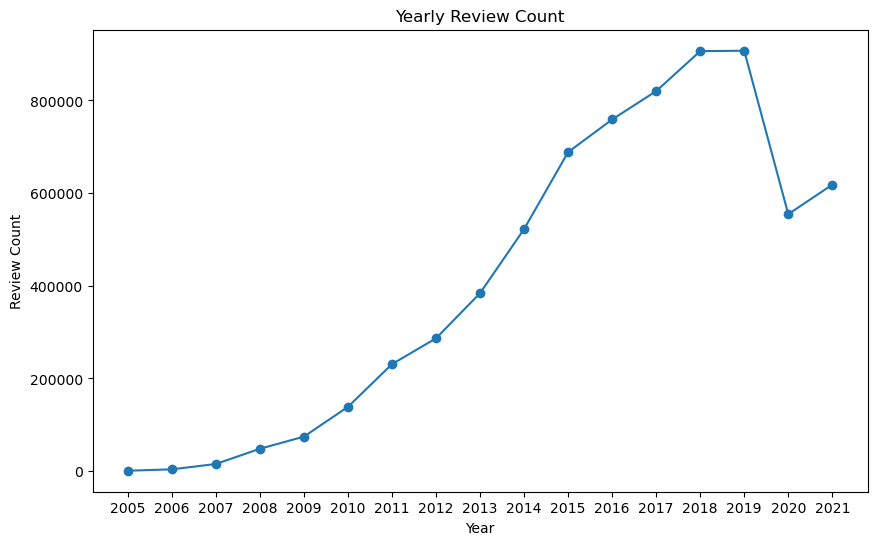

In [ ]:
review_less_than_2022 = review_for_each_year[review_for_each_year['year'] < 2022]
plt.figure(figsize=(10, 6))
plt.plot(review_less_than_2022['year'], review_less_than_2022['review_count'], marker='o')
plt.title('Yearly Review Count')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.xticks(review_less_than_2022['year'])
plt.show()

According to this graph, we can see a significant growth from 2005 to 2015. This suggests that the Yelp platform has a growing engagement, which means the business of Yelp gained success during this period. From 2015 to 2019, the review count remained stable at a high level, which indicates that the market and the user amount are stable. From 2020, the review amount has a sharp decline, which may be because of COVID-19. During this period, people stayed at home and businesses had to close, thus the reviews amount decreased sharply.

**Q3. What regions have more opportunities for businesses? Does more business mean higher reviews for states?**

In [ ]:
df_business.createOrReplaceTempView("business")
df_review.createOrReplaceTempView("review")

In [ ]:
# Assigning categories properly to the businesses using Case
busi = spark.sql('''
SELECT *,
       CASE
           WHEN LOWER(categories) LIKE '%medicine%' THEN 'Medicine'
           WHEN LOWER(categories) LIKE '%restaurant%' THEN 'Food'
           WHEN LOWER(categories) LIKE '%pet%' THEN 'Pet'
           WHEN LOWER(categories) LIKE '%school%' THEN 'Education'
           WHEN LOWER(categories) LIKE '%shopping%' THEN 'Shopping'
           WHEN LOWER(categories) LIKE '%bank%' THEN 'Bank'
           ELSE 'Other'
       END AS category
FROM business
''')
busi = busi.toPandas()
busi.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,category
0,"1616 Chapala St, Ste 2","(None, None, None, None, None, None, None, Non...",Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,None,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA,Medicine
1,87 Grasso Plaza Shopping Center,"(None, None, None, None, None, None, None, Non...",mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"(8:0-18:30, 0:0-0:0, 8:0-14:0, None, 8:0-18:30...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO,Other
2,5255 E Broadway Blvd,"(None, None, None, None, None, None, None, Tru...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"(8:0-23:0, 8:0-22:0, 8:0-23:0, 8:0-22:0, 8:0-2...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ,Shopping
3,935 Race St,"(None, None, u'none', None, None, None, None, ...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"(7:0-21:0, 7:0-20:0, 7:0-21:0, 7:0-21:0, 7:0-2...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA,Food
4,101 Walnut St,"(None, None, None, None, None, None, None, Tru...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"(12:0-22:0, None, 12:0-22:0, 12:0-18:0, 16:0-2...",1,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13,4.5,PA,Other
5,615 S Main St,"(None, None, u'none', None, None, None, None, ...",CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Ashland City,"(9:0-0:0, 0:0-0:0, 9:0-22:0, 8:0-22:0, 6:0-22:...",1,36.269593,-87.058943,Sonic Drive-In,37015,6,2.0,TN,Food
6,"8522 Eager Road, Dierbergs Brentwood Point","(None, None, None, None, None, None, None, Tru...",n_0UpQx1hsNbnPUSlodU8w,"Sporting Goods, Fashion, Shoe Stores, Shopping...",Brentwood,"(10:0-18:0, 0:0-0:0, 10:0-18:0, 12:0-18:0, 10:...",1,38.627695,-90.340465,Famous Footwear,63144,13,2.5,MO,Shopping
7,400 Pasadena Ave S,None,qkRM_2X51Yqxk3btlwAQIg,"Synagogues, Religious Organizations",St. Petersburg,"(9:0-17:0, 9:0-17:0, None, None, 9:0-17:0, 9:0...",1,27.766590,-82.732983,Temple Beth-El,33707,5,3.5,FL,Other
8,8025 Mackenzie Rd,"(None, None, u'full_bar', {'romantic': False, ...",k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr...",Affton,None,0,38.565165,-90.321087,Tsevi's Pub And Grill,63123,19,3.0,MO,Food
9,2312 Dickerson Pike,"(None, None, u'none', None, None, None, None, ...",bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Nashville,"(6:0-16:0, 0:0-0:0, 6:0-17:0, 6:0-21:0, 6:0-16...",1,36.208102,-86.768170,Sonic Drive-In,37207,10,1.5,TN,Food


In [ ]:
# Ranking states based on the number of businesses and star ratings
results = spark.sql('''
SELECT state,
       COUNT(DISTINCT business_id) as num_businesses,
       RANK() OVER (ORDER BY COUNT(DISTINCT business_id) DESC) as rank_by_businesses,
       SUM(stars * review_count) / SUM(review_count) as avg_stars,
       RANK() OVER (ORDER BY SUM(stars * review_count) / SUM(review_count) DESC) as rank_by_stars
FROM business
GROUP BY state
HAVING SUM(review_count) >100
ORDER BY num_businesses DESC
''')
results = results.toPandas()
results

24/04/28 20:22:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 20:22:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 20:22:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 20:22:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 20:22:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 20:22:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/28 2

,state,num_businesses,rank_by_businesses,avg_stars,rank_by_stars
0,PA,26317,1,3.738740,9
1,FL,20974,2,3.801024,6
2,TN,9619,3,3.801366,5
3,IN,8856,4,3.825141,3
4,MO,8848,5,3.767181,7
5,AZ,7793,6,3.731065,10
6,LA,7644,7,3.902366,2
7,NJ,6620,8,3.603976,12
8,NV,5844,9,3.759611,8
9,AB,4111,10,3.663440,11


The above query ranks each region by the number of businesses and the avg stars businesses recieve. Average stars and ranks derived from it tell us how consumers find businesses in their states. The number of businesses and the ranks derived from this give us insights on how good an environment is for businesses to prosper. We can see that if the state can build a condusive environment for businesses, the consumer satisfaction also increases.

#### 6.2 Analysis based on region of business

**Q4. What are the top 10 states relative to the number of businesses?**

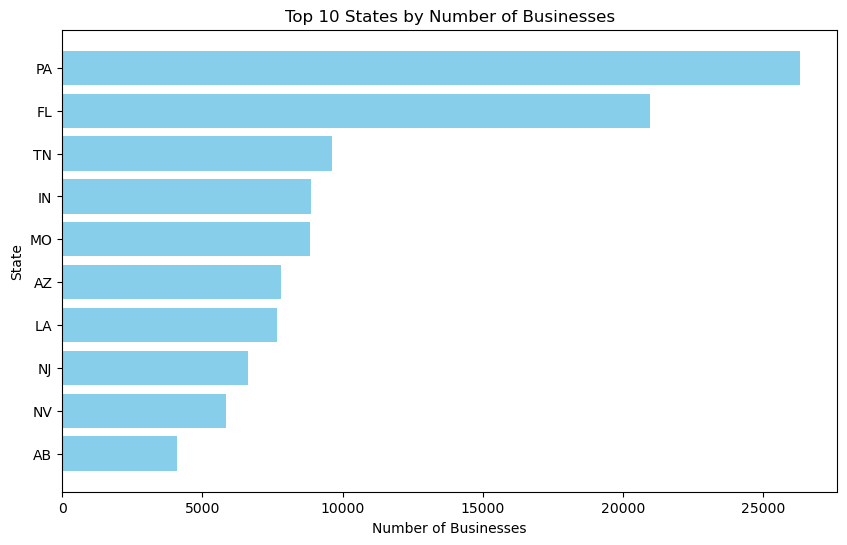

In [ ]:
results = results.head(10)
plt.figure(figsize=(10, 6))
plt.barh(results['state'], results['num_businesses'], color='skyblue')
plt.xlabel('Number of Businesses')
plt.ylabel('State')
plt.title('Top 10 States by Number of Businesses')
plt.gca().invert_yaxis()  # Inverting y-axis to display the state with the most businesses at the top
plt.show()

The above graph looks at the top 10 states by their number of businesses. This graph can be interpreted in 2 very different ways. If we believe the dataset is complete or in proportion, then we can see that a lot of states can learn from the Pennsylvania and Florida. States can incentivise more businesses to start. on the other hand if Yelp believes this dataset is not complete(seems like the more likely case), it can now target states to increase its usage in those states. This would benefit Yelp increase market market share.

**Q5. What are the top ten states that customers frequently use Yelp to review the restaurants?**

In [ ]:
# Finding top 10 states with most review counts
top_ten_cities_reviewcount = (
    df_review
    .join(df_business, df_review.business_id == df_business.business_id, 'inner')
    .groupBy("city")
    .count()
    .toPandas()
    .sort_values(by='count', ascending=False)
    .head(10)
)

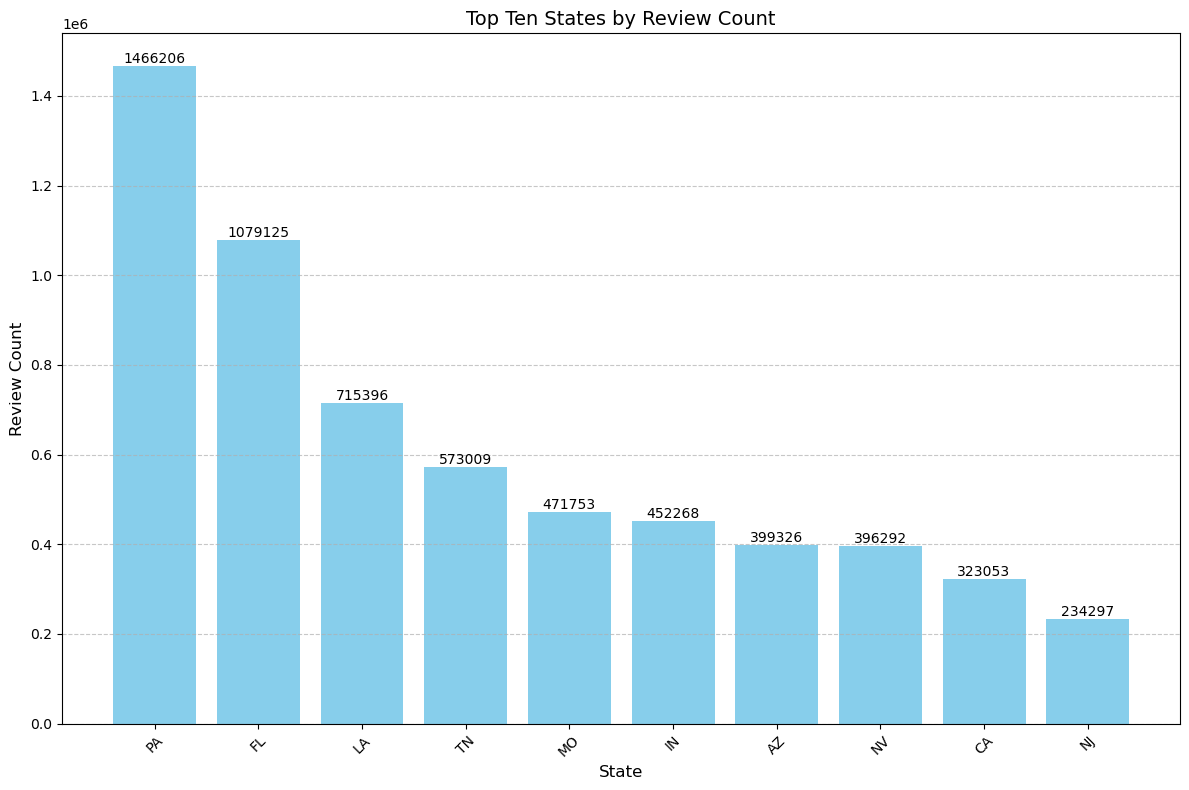

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(top_ten_state_reviewcount['state'], top_ten_state_reviewcount['count'], color='skyblue')

for i, count in enumerate(top_ten_state_reviewcount['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('State', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Top Ten States by Review Count', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This graph elucidates the top ten states in terms of review volume on Yelp, a platform instrumental for customers seeking insights into restaurants before visiting. The data indicates that both Pennsylvania (PA) and Florida (FL) have amassed over one million reviews. Notably, while Louisiana (LA) ranks seventh in the number of businesses, it stands as the third-highest in review count, suggesting a comparatively higher level of customer engagement than Tennessee (TN). This analysis offers valuable perspective on consumer interaction and feedback trends across various states.

**Q6. What are the top ten cities that customers frequently use Yelp to review the restaurants?**

In [ ]:
df_review.join(df_business, df_review.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .count() \
    .toPandas() \
    .sort_values(by='count', ascending=False) \
    .head(10)

,city,count
75,Philadelphia,895211
295,New Orleans,600715
123,Nashville,423305
240,Tampa,423268
408,Tucson,374702
107,Indianapolis,334126
293,Reno,324065
428,Santa Barbara,250180
391,Saint Louis,235602
149,Boise,96401


In addition to the State level, we want to look at the city level to see which cities have high review counts for the restaurants. Phildelphia city still, has the highest review count compare to other cities.

**Q7. What are the top ten cities that customers frequently use Yelp to check-in?**

In [ ]:
df_checkin.join(df_business, df_checkin.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .count() \
    .toPandas() \
    .sort_values(by='count', ascending=False) \
    .head(10)

,city,count
118,Philadelphia,10071
396,Tampa,6565
705,Tucson,6332
174,Indianapolis,5461
196,Nashville,4979
499,New Orleans,4530
495,Reno,3931
487,Edmonton,3507
674,Saint Louis,3428
743,Santa Barbara,2350


As Yelp is offering the check-in function for customers when planning to dine in a restaurant, we want to briefly have an idea how frequently customers use Yelp to reservae a spot. From the above query result, we are able to see that customers in the  Philadelphia city use this check-in function with over 10,000 counts.

**Q8. What are the top ten cities that customers frequently use Yelp to give compliments the restaurants?**

In [ ]:
df_tips.join(df_business, df_tips.business_id == df_business.business_id, 'inner') \
    .groupBy("city") \
    .agg({'compliment_count': 'count'}) \
    .toPandas() \
    .sort_values(by='count(compliment_count)', ascending=False) \
    .head(10)

,city,count(compliment_count)
133,Philadelphia,109081
524,New Orleans,79013
412,Tampa,59334
740,Tucson,53242
192,Indianapolis,50547
213,Nashville,48492
707,Saint Louis,39644
514,Reno,39201
773,Santa Barbara,26464
505,Edmonton,12168


Providing compliments meaning that customers had a great experience in the restaurants. Here we break it done by cities and order them by the compliment count to see which city overall provide customers a good experience. Both Philadelphia and New Orleans city ranked to be the top two in this dataset.

**Q9. Does the distribution of ratings vary among states?**

This is an important question for current and future business owners. If distribtions vary among states, this could infer that it might be better to open in specific states. For example, if ratings skew lower and you're an established franchise with typically a high star rating, you may want to look in these states. Another insight could be that if the ratings skew on the high end, that state may have too many businesses that could cause a high barrier to entry and too much competition for new businesses.

First we need to join the business dataframe to the reviews, so that we can group reviews by the state of the business. Then we can filter down to only states with at least 50 reviews, as a handful only have a couple reviews (which is not a large enough sample to provide any insight).

In [ ]:
biz_data = df_business.select('business_id', 'state')
joinExpression = df_review['business_id'] == biz_data['business_id']
biz_w_review = df_review.join(biz_data, joinExpression, 'left_outer')

In [ ]:
biz_w_review.groupBy("state").count()\
            .filter(F.col("count") > 50)\
            .orderBy('count', ascending=False)\
            .select("state")\
            .show()

+-----+
|state|
+-----+
|   PA|
|   FL|
|   LA|
|   TN|
| null|
|   MO|
|   IN|
|   AZ|
|   NV|
|   CA|
|   NJ|
|   ID|
|   AB|
|   DE|
|   IL|
+-----+



In [ ]:
states = biz_w_review.groupBy("state")\
            .count()\
            .filter(F.col("count") > 50)\
            .orderBy('count', ascending=False)\
            .select("state").collect()

states_list = [states[i][0] for i in range(0, len(states))]

In [ ]:
biz_w_review.filter(F.col('state').isin(states_list)).select('stars', 'state').show()

+-----+-----+
|stars|state|
+-----+-----+
|  3.0|   PA|
|  5.0|   PA|
|  5.0|   PA|
|  4.0|   LA|
|  1.0|   PA|
|  5.0|   LA|
|  5.0|   PA|
|  3.0|   CA|
|  5.0|   FL|
|  4.0|   IN|
|  4.0|   MO|
|  4.0|   PA|
|  4.0|   AZ|
|  5.0|   FL|
|  5.0|   PA|
|  4.0|   MO|
|  5.0|   FL|
|  5.0|   PA|
|  5.0|   MO|
|  3.0|   IN|
+-----+-----+
only showing top 20 rows



In [ ]:
plot_slice = biz_w_review.filter(F.col('state').isin(states_list)).select('stars', 'state').toPandas()

<Figure size 1000x600 with 0 Axes>

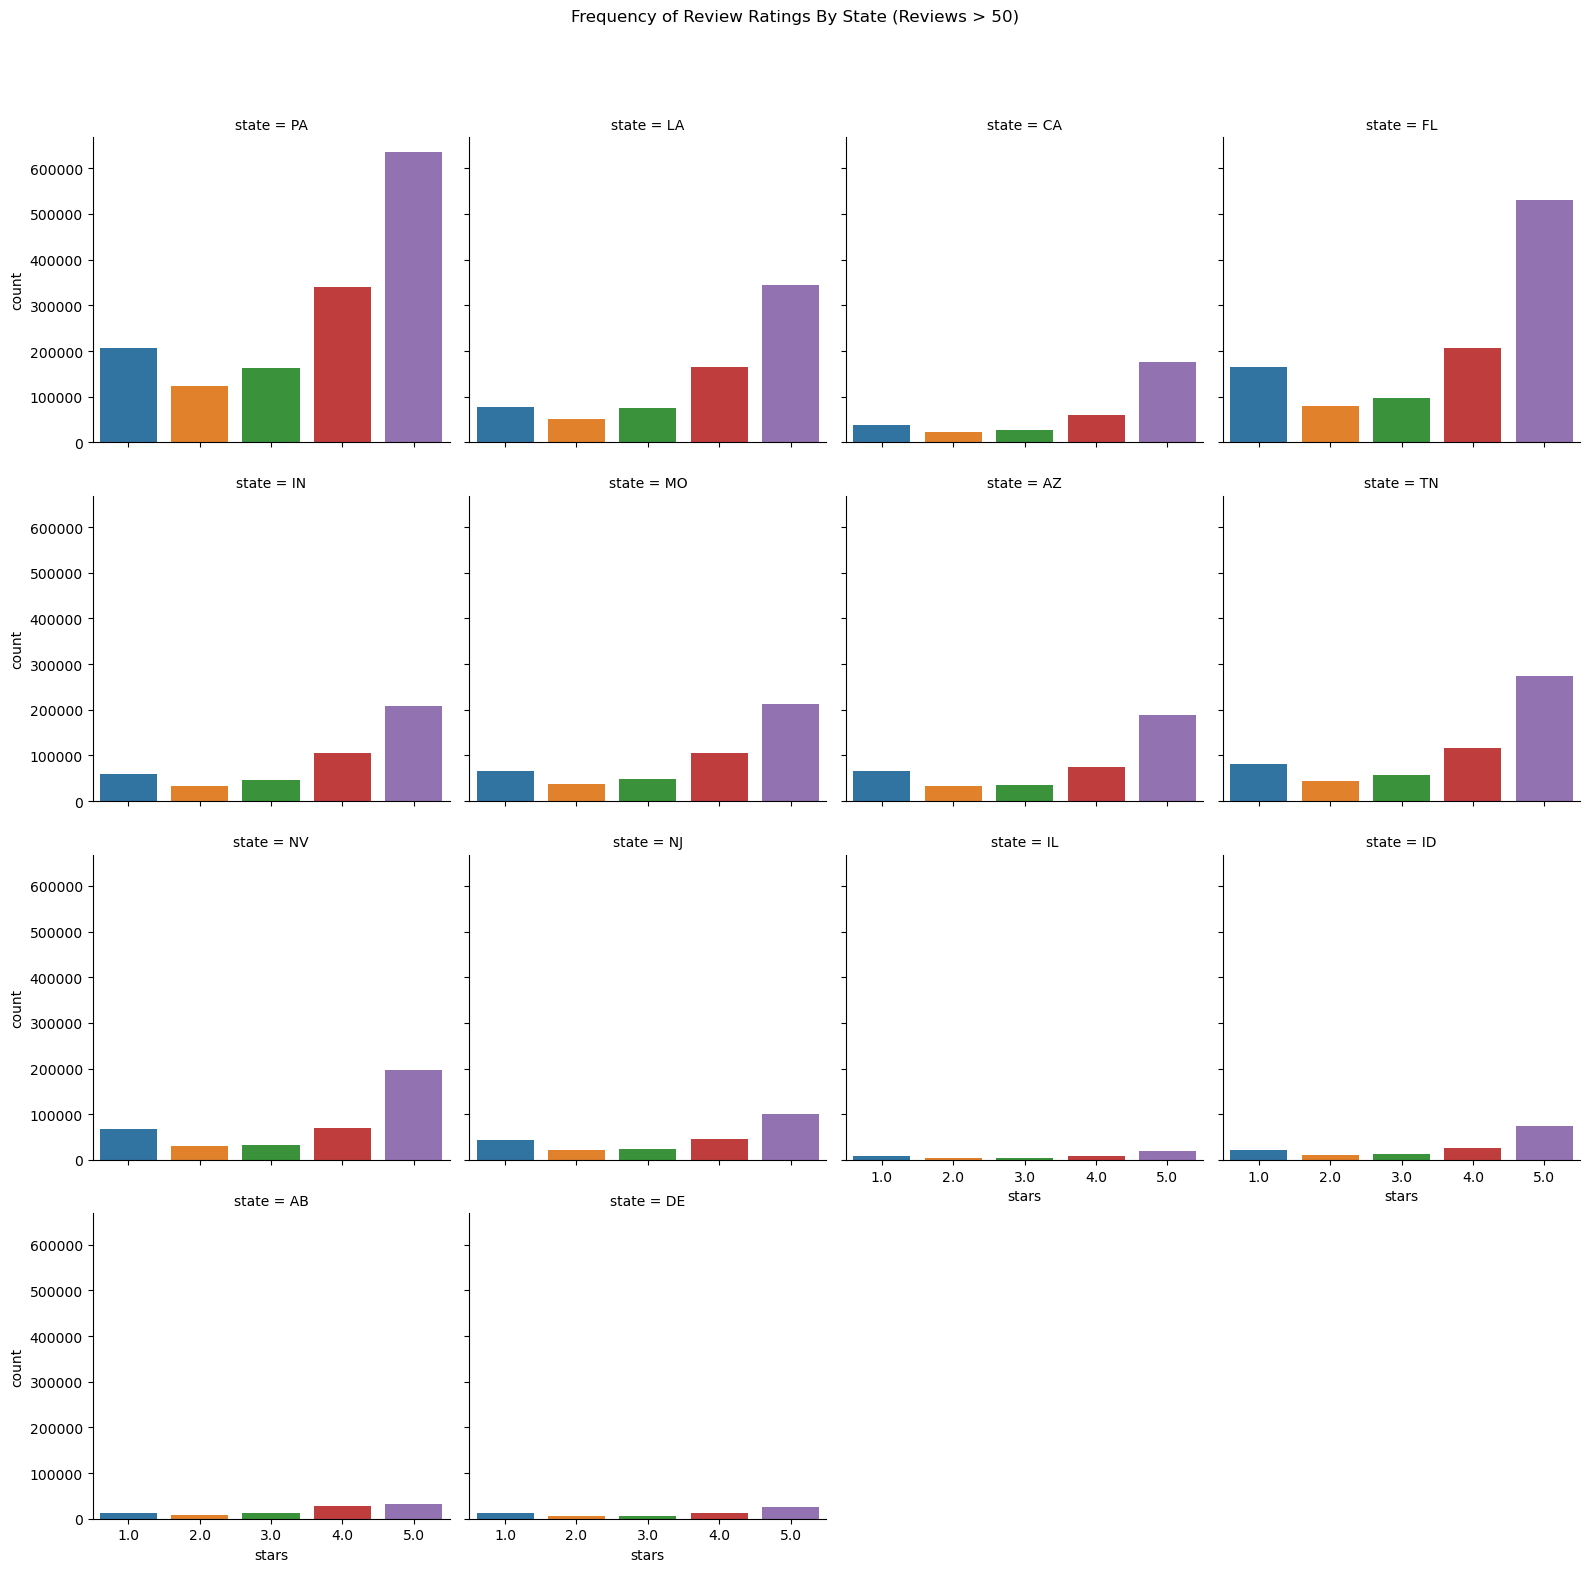

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(data=plot_slice, x='stars', kind='count', col='state', col_wrap=4, height=4)

plt.subplots_adjust(top=0.9)
plt.suptitle('Frequency of Review Ratings By State (Reviews > 50)')
plt.show();

In prior analyses, we focused on identifying states with the highest volume of reviews. Building on this, our current graph shifts to understanding the distribution of ratings across various states. The count of reviews in each rating is irrelevant, as the main insight here is the shape that the distributions take. If you look closely across each state, you'll notice that the distributions are relatively the same, with the highest frequency of ratings falling at 5, then 4, then 1. This suggests that at this level of aggregation there is no difference among states in terms of ratings. Given this result, we should drill further into specific categories or cities.

#### 6.3 Analysis based on business categories

**Q10. What are the top 10 most rated and least rated business categories based on their ratings from the users?**

In [ ]:
df_business_1 = df_business.withColumn("category", F.explode(F.split(F.col("categories"), ", ")))
avg_rating_per_category = df_business_1.groupBy("category") \
                                              .agg(F.avg("stars").alias("average_stars")) \
                                              .orderBy(F.desc("average_stars"))\
                                              .limit(10)

avg_rating_per_category.show()

+--------------------+-------------+
|            category|average_stars|
+--------------------+-------------+
|             Embassy|          5.0|
|        Contract Law|          5.0|
|          Patent Law|          5.0|
|         Experiences|          5.0|
|     Art Consultants|          5.0|
|  Editorial Services|          5.0|
|   IP & Internet Law|          5.0|
|       Bicycle Paths|          5.0|
|Sport Equipment Hire|          5.0|
|         Calligraphy|          5.0|
+--------------------+-------------+



In [ ]:
avg_rating_per_category = df_business_1.groupBy("category") \
                                              .agg(F.avg("stars").alias("average_stars")) \
                                              .orderBy(F.asc("average_stars"))\
                                              .limit(10)

avg_rating_per_category.show()

+--------------------+------------------+
|            category|     average_stars|
+--------------------+------------------+
|Electricity Suppl...|               1.5|
|           Foot Care|               1.5|
|            Sledding|               2.0|
|       DIY Auto Shop|               2.0|
|        Pathologists|               2.0|
|   Behavior Analysts| 2.142857142857143|
|Television Servic...|2.2016806722689077|
|          Urologists|2.2708333333333335|
|        Car Auctions|               2.3|
|  University Housing|2.3229166666666665|
+--------------------+------------------+



The insights derived from these query outcomes enable a nuanced comprehension of customer preferences, as manifested through their reviews. The analysis delineates a clear dichotomy in user sentiment: on one end of the spectrum, business categories such as Mohels, Embassy, Water Suppliers, and Art Consultants are universally acclaimed, consistently garnering the pinnacle of ratings. Conversely, on the opposite end, categories including Electricity Suppliers, Foot Care, Sledding , and Car Auctions appear to be less favored, with average ratings approximating 2. This data not only reflects the collective approval or disapproval of services but also potentially guides future improvements in customer satisfaction and business strategies.

**Q11. What are the top 5 businesses with the most checkins recorded?**

In [ ]:
df_checkin_1 = df_checkin.withColumn("checkin_date", explode(split(col("date"), ",\s*")))
joined_df = df_business.join(df_checkin_1, "business_id")
top_business_checkins = joined_df.groupBy("business_id", "name") \
                                 .agg(count("checkin_date").alias("total_checkins")) \
                                 .orderBy(col("total_checkins").desc()) \
                                 .limit(5)

top_business_checkins.select('name', 'total_checkins').show()

+--------------------+--------------+
|                name|total_checkins|
+--------------------+--------------+
|Philadelphia Inte...|         52144|
|       Café Du Monde|         40109|
|Louis Armstrong N...|         37562|
|Tampa Internation...|         37518|
|Nashville Interna...|         31168|
+--------------------+--------------+



The query results identify the top five businesses with the highest customer check-ins, offering key insights into customer footfall and popularity. This information is crucial for understanding market trends, guiding marketing strategies, and assessing competitive standing. High check-in counts can indicate successful customer engagement and attraction, serving as a valuable metric for business growth and strategic decision-making.

**Q12. Which businesses demonstrate both high engagement and consistent quality, based on their tip and review counts, and stable yearly ratings?**

In [ ]:
engagement_df = df_tips.groupBy("business_id") \
                      .agg(count("*").alias("total_tips")) \
                      .join(df_review.groupBy("business_id") \
                                    .agg(count("*").alias("total_reviews")), "business_id")
rating_df = df_review.withColumn("year", year("date")) \
                           .groupBy("business_id", "year") \
                           .agg(avg("stars").alias("avg_yearly_stars"))
window = Window.partitionBy("business_id")
performance = engagement_df.where((col("total_tips") > 100) & (col("total_reviews") > 500)) \
                                                      .join(rating_df, "business_id") \
                                                      .withColumn("rating_variance", stddev("avg_yearly_stars").over(window)) \
                                                      .where(col("rating_variance") < 0.5)
df = performance.join(df_business, "business_id") \
                .select(df_business["name"], "total_tips", "total_reviews", "rating_variance").distinct()
df.show()

+--------------------+----------+-------------+-------------------+
|                name|total_tips|total_reviews|    rating_variance|
+--------------------+----------+-------------+-------------------+
|     Oxford Exchange|       243|         1938| 0.1789264886802334|
|          Two Chicks|       127|         1549|0.23319761664491812|
|Frenchy's Saltwat...|       107|          861| 0.4283533012152771|
|Atlantis Casino R...|       131|         1295|  0.365000983224259|
|                Fork|       210|         1872| 0.2767063698781251|
|       Tropical Isle|       120|          583| 0.2893085521719972|
|              El Vez|       333|         3264|   0.35054080688655|
|Bacchanal Fine Wi...|       139|         1178|0.33511503221560596|
|        Finch & Fork|       131|         1434|0.28000972138271774|
|Atchafalaya Resta...|       197|         2083| 0.2044456555380319|
|Nashville Interna...|       521|          990|0.36706170900678387|
|   Hansen's Sno-Bliz|       123|          520|0

This query uncovers businesses that consistently engage customers and maintain quality over time, as shown by their substantial number of tips and reviews combined with low variance in annual star ratings. In this query, minimum tips of 100 and minimum reviews of 500 are considered, as a random assignment, in order to carry out the analysis of moderate level businesses. Businesses highlighted in these results likely excel in customer satisfaction and retention, indicating a successful blend of quality service and active customer interaction. This data is instrumental for identifying industry leaders and models of operational excellence, offering valuable benchmarks for businesses striving to enhance their own customer engagement and service consistency.

**Q13. What are the top 5 most popular business categories based on the number of reviews recorded?**

In [ ]:
popular_categories = df_business.join(df_review, "business_id") \
                                .withColumn("category", explode(split(col("categories"), ", "))) \
                                .groupBy("category") \
                                .count() \
                                .orderBy(col("count").desc()) \
                                .limit(5)

popular_categories.show()

+--------------------+-------+
|            category|  count|
+--------------------+-------+
|         Restaurants|4557625|
|                Food|1749262|
|           Nightlife|1498579|
|                Bars|1422790|
|American (Traditi...| 990473|
+--------------------+-------+



This query reveals the top five most popular business categories based on the number of reviews they receive. Such information is crucial for understanding consumer engagement in providing feedback to the business. Businesses can use these insights to identify potential areas for marketing investment. It also helps in pinpointing which sectors are currently thriving in terms of customer interest and engagement.

**Q14. What are the top 5 businesses based on the number of reviews recorded?**

In [ ]:
df_business.createOrReplaceTempView("business")

# Query to find the top 5 businesses
query = """
SELECT
    name,
    review_count,
    state
FROM
    business
ORDER BY
    review_count DESC
LIMIT
    5
"""
top_5_popular_businesses = spark.sql(query)
top_5_popular_businesses.show()

+--------------------+------------+-----+
|                name|review_count|state|
+--------------------+------------+-----+
|   Acme Oyster House|        7568|   LA|
|        Oceana Grill|        7400|   LA|
|Hattie B’s Hot Ch...|        6093|   TN|
|Reading Terminal ...|        5721|   PA|
|Ruby Slipper - Ne...|        5193|   LA|
+--------------------+------------+-----+



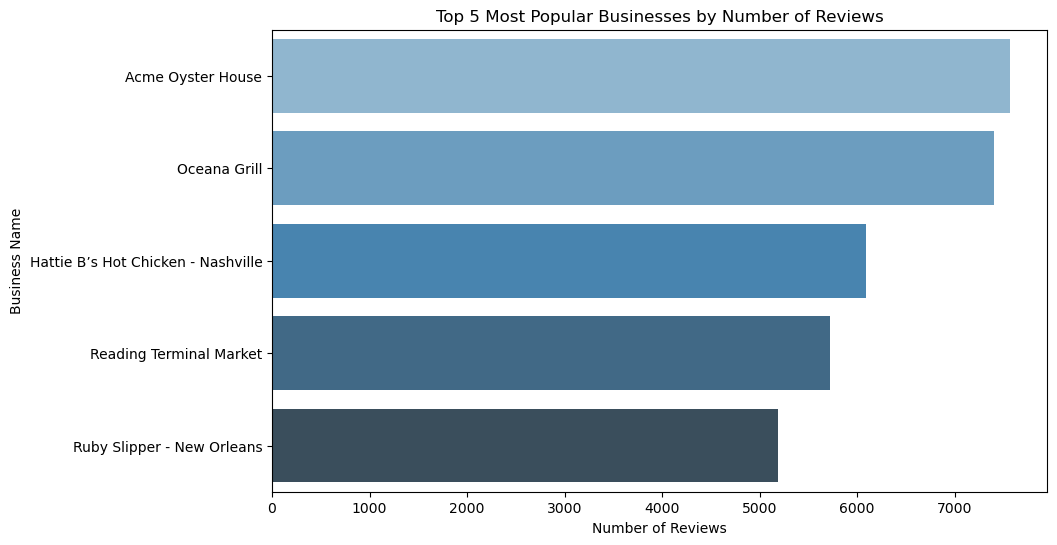

In [ ]:
# Converting query output to Pandas DataFrame
top_5_popular_businesses_pd = top_5_popular_businesses.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='name', data=top_5_popular_businesses_pd, palette='Blues_d')
plt.title('Top 5 Most Popular Businesses by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Name')
plt.show()

The graph depicting the top five businesses by the number of reviews highlights a notable pattern: most of the top-ranked businesses are in the restaurant category, emphasizing the strong consumer interest in dining experiences. The leading business has garnered over 7,000 reviews, indicating substantial customer engagement and possibly reflecting a large, satisfied customer base. Additionally, several of these highly-reviewed businesses are located in Louisiana (LA), suggesting a thriving food scene and an active Yelp user community in this state. This trend offers insights into regional popularity and underscores the influence of user-generated content on business success. Understanding these dynamics can be beneficial for businesses seeking to improve customer satisfaction and for marketers aiming to focus on areas with high consumer interaction.import matplotlib.pyplot as plt

**Q15. How many shops do each category, especially the most popular categories, have?**

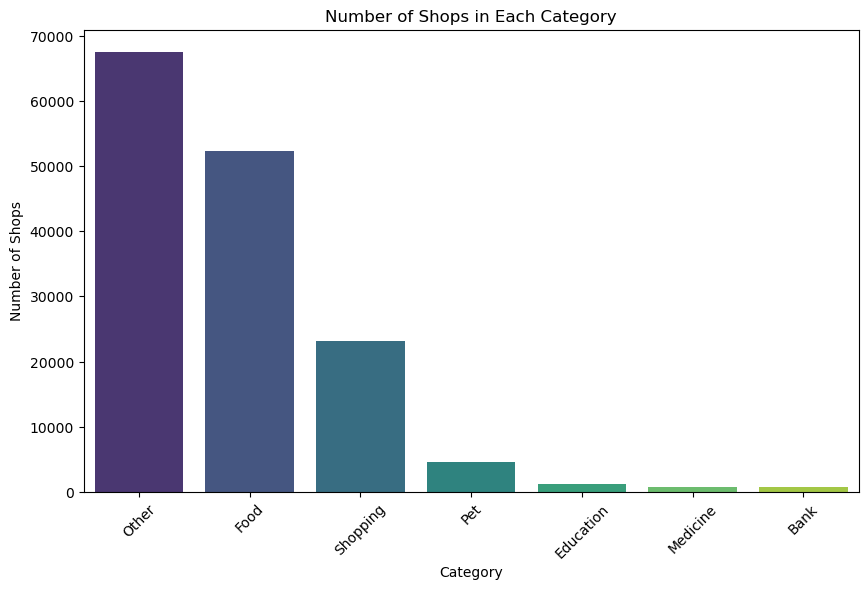

In [ ]:
# Counting the occurrences of each category
category_counts = busi['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Number of Shops')
plt.title('Number of Shops in Each Category')
plt.xticks(rotation=45)
plt.show()


The graph above was created using a fuzzy match to categorise the different business into 6 main sub-categories. These categories are not exhaustive. However, with the number of businesses in each sub-category we can clearly see a trend. The highest number of business are food based. Either restaurants, cafes, bakeries etc. Next, we see Shopping which thought second has less than half the number of shops in our dataset. This makes some sense as these places usually require more space than a restaurant. The low representation of education and hospital-related businesses is intriguing. These sectors play critical roles in society but don’t require frequent physical presence. Schools, colleges, and universities serve large populations but are relatively few in number due to their scale and specialized purpose. Healthcare facilities are essential, but their concentration is typically based on population density and medical needs. Fewer hospitals may indicate efficient distribution or gaps in healthcare access. It’s essential to recognize that these trends can vary by region, culture, and economic factors. For instance, densely populated urban areas may have more food options, while rural regions might prioritize education and healthcare. It might therefore be useful to look at the data for each state and if possible-counties.


**Q16. count of specific categories within the business "Food" category**

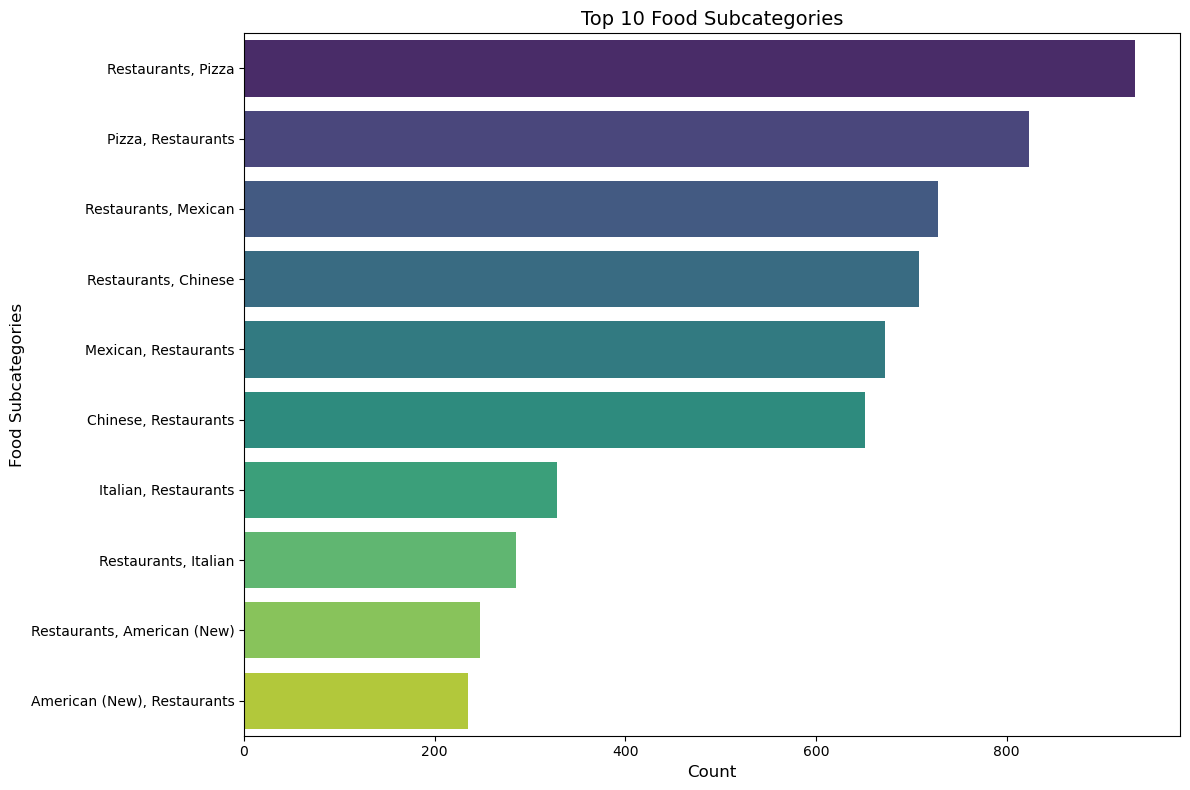

In [ ]:
food_category = busi[busi['category'] == 'Food']

# Grouping by specific categories within the "Food" category
food_category_counts = food_category.groupby('categories').size().reset_index(name='count')

# Ordering them by the sum of counts in descending order
food_category_counts = food_category_counts.sort_values(by='count', ascending=False)

top_10_food_subcategories = food_category_counts.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='categories', data=top_10_food_subcategories, palette='viridis')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Food Subcategories', fontsize=12)
plt.title('Top 10 Food Subcategories', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The above bar chart provided insight into the most popular types of restaurants, revealing that the top categories included Pizza, Mexican, Chinese, Italian, and New American cuisine. Interestingly, there was a labeling error in the chart that flipped the names, indicating these were the top five restaurant types instead of the top ten as initially assumed. This correction helps us focus our analysis on these five key categories, understanding their popularity more accurately.

**Q17. Are fast-food chains slowing down in popularity?**

In [ ]:
# finding average ratings, review count and total number of businesses of top fast food joints
fast_food = spark.sql('''
    SELECT
        name AS Restaurant,
        AVG(stars) AS Avg_Review,
        SUM(review_count) AS Review_Count,
        COUNT(*) AS Total_Businesses
    FROM business
    WHERE
        name IN ('Burger King', 'Subway', 'Popeyes', 'McDonald''s', 'Starbucks', 'KFC', 'Chick-Fil-A', 'Domino''s', 'Wendy''s', 'Arby''s')
    GROUP BY name
    HAVING Total_Businesses >100
    ORDER BY Avg_Review DESC
''')
fast_food_df = fast_food.toPandas()
fast_food_df.head(10)

#Chatgpt was used to fix a code where Restaurants with an apostrophe were breaking the code evening with a \.

,Restaurant,Avg_Review,Review_Count,Total_Businesses
0,Starbucks,3.126381,20692,724
1,Subway,2.586057,4123,459
2,Burger King,2.028107,5255,338
3,KFC,1.859649,2923,171


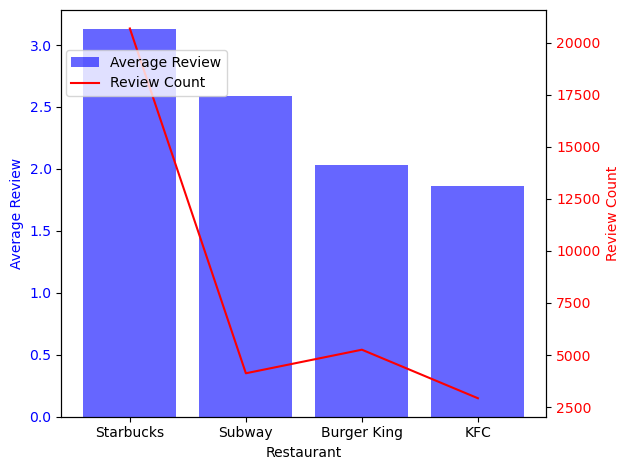

In [ ]:
restaurants = fast_food_df['Restaurant']
avg_reviews = fast_food_df['Avg_Review']
review_counts = fast_food_df['Review_Count']

fig, ax1 = plt.subplots()

# Plotting average review scores
ax1.bar(restaurants, avg_reviews, color='b', alpha=0.6, label='Average Review')
ax1.set_xlabel('Restaurant')
ax1.set_ylabel('Average Review', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot review count
ax2 = ax1.twinx()
ax2.plot(restaurants, review_counts, color='r', label='Review Count')
ax2.set_ylabel('Review Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()



In the previous graph we noticed that food subcategory was the most populated in our dataset. The above Graph shows us fast food restaurants and their average reviews for restaurants with more than 100 locations in our dataset. We observe that the average user ratings are generally low. Starbucks, despite being a prominent player in this category, only manages to achieve a rating slightly above 3 stars. This suggests that consumers are often dissatisfied with the quality or experience provided by fast food establishments. The low ratings shed light on how fast food is perceived by the public. While it remains a convenient option for busy individuals, there are concerns about its nutritional value, health implications, and overall quality. Fast food is often associated with high-calorie, processed meals that may contribute to health issues like obesity and heart disease. The correlation between low ratings and the “fast food” label underscores the perception that these establishments prioritize speed and convenience over healthiness. Consumers are increasingly conscious of their dietary choices, seeking alternatives that offer better nutritional value. As the fast food industry evolves, there’s an opportunity for restaurants to strike a balance between convenience and quality. Some chains have responded by introducing healthier menu options, emphasizing fresh ingredients, and addressing sustainability concerns. However, the challenge lies in maintaining speed while improving overall satisfaction. This would explain why Starbucks and Subway(though its bread came under scrutiny recently) are rated higher than KFC and Burger King.

**Q18. What are the top ten most frequent shopping stores around?**

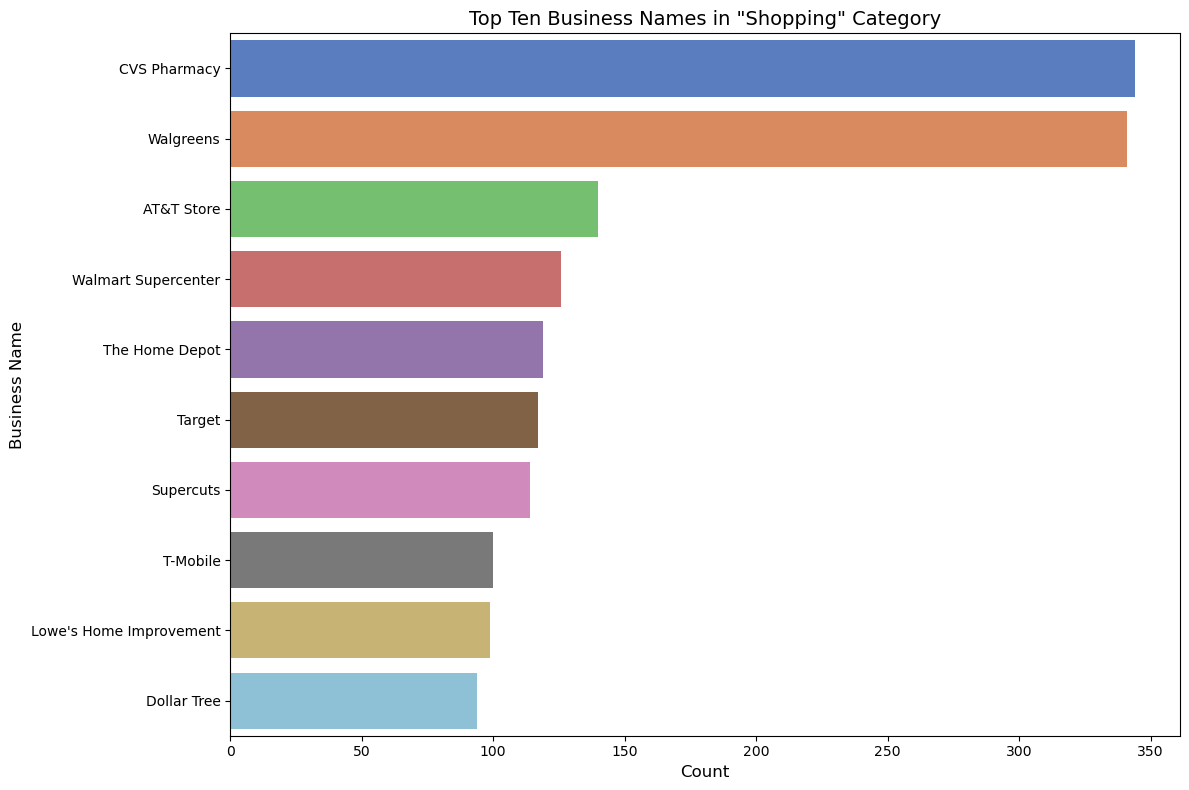

In [ ]:
shopping_category = busi[busi['category'] == 'Shopping']

# Grouping by business names within the "Shopping" category
shopping_name_counts = shopping_category.groupby('name').size().reset_index(name='count')
shopping_name_counts = shopping_name_counts.sort_values(by='count', ascending=False)
top_ten_shopping_names = shopping_name_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='name', data=top_ten_shopping_names, palette='muted')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Business Name', fontsize=12)
plt.title('Top Ten Business Names in "Shopping" Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In our prior analysis, the Shopping category frequently appeared, prompting us to explore this business segment in more detail. Significantly, CVS Pharmacy and Walgreens stood out as the dominant players with the most extensive coverage within this dataset. This indicates a significant presence and influence in the retail market, reflecting their pivotal role in consumer shopping habits across various regions.

**Q19. Which numerical attributes contribute to the success of a business?**

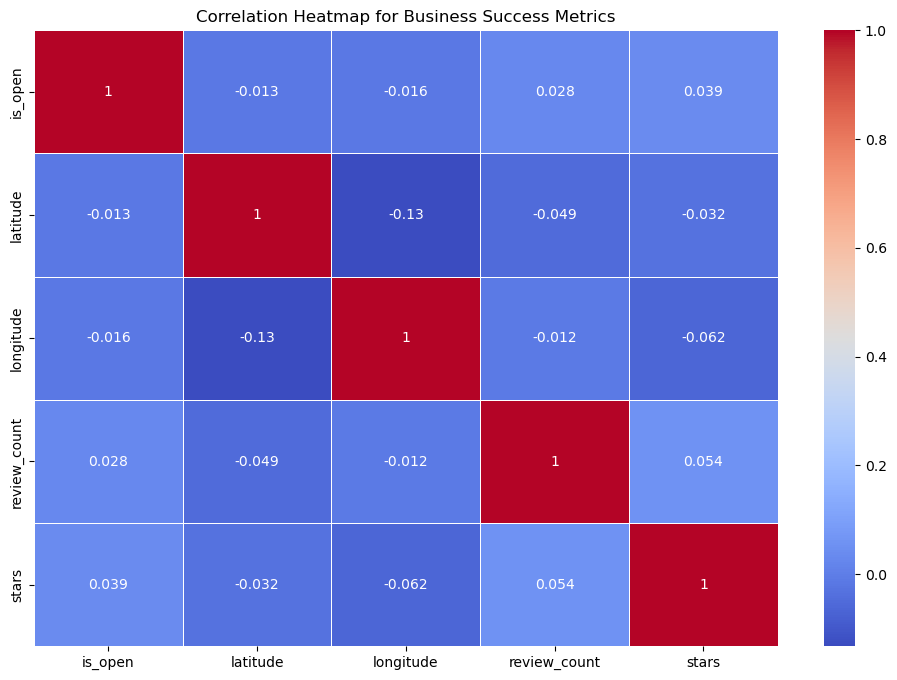

In [ ]:
# Correlations between numerical business metrics
correlation_matrix = df_business.toPandas().corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Business Success Metrics')
plt.show()

The heatmap illustrating the correlation matrix among the numerical attributes in the business DataFrame provides an insightful overview of how various factors are interrelated. While the graph indicates that no single attribute is a definitive predictor of business success, some correlations are worth noting. A positive correlation between star ratings and the number of reviews suggests that these two factors can contribute to a business's success, indicating that highly-rated businesses tend to attract more reviews, likely reflecting customer satisfaction. Conversely, the observation that longitude has a negative correlation with success could imply geographical influences on business performance. Overall, while the correlations are subtle, they offer a nuanced understanding of the complex factors contributing to business success.

**Q20. What are the most and least popular business categories in each state based on their ratings?**

In [ ]:
df_business.createOrReplaceTempView("business")
query = """
WITH StateCategoryRatings AS (
    SELECT state, category, AVG(stars) as avg_rating
    FROM (
        SELECT state, EXPLODE(SPLIT(categories, ', ')) AS category, stars
        FROM business
    )
    GROUP BY state, category
),
RankedCategories AS (
    SELECT state, category, avg_rating,
    RANK() OVER (PARTITION BY state ORDER BY avg_rating DESC) as rank_desc,
    RANK() OVER (PARTITION BY state ORDER BY avg_rating ASC) as rank_asc
    FROM StateCategoryRatings
)
SELECT state, category, avg_rating,
    CASE
        WHEN rank_desc = 1 THEN 'Most Popular'
        WHEN rank_asc = 1 THEN 'Least Popular'
    END as Popularity
FROM RankedCategories
WHERE rank_desc = 1 OR rank_asc = 1
"""
category_popularity_ratings = spark.sql(query)
category_popularity_ratings_pd = category_popularity_ratings.toPandas()

In [ ]:
category_popularity_ratings_pd.head()

,state,category,avg_rating,Popularity
0,AB,Television Service Providers,1.0,Least Popular
1,AB,Lawn Services,1.0,Least Popular
2,AB,Telecommunications,1.0,Least Popular
3,AB,Funeral Services & Cemeteries,5.0,Most Popular
4,AB,Distilleries,5.0,Most Popular


In [ ]:
states = category_popularity_ratings_pd['state'].unique()
state_widget = widgets.Dropdown(options=states, description='State:')
output = widgets.Output()
def create_bar_chart(state):
    with output:
        output.clear_output(wait=True)
        filtered_df = category_popularity_ratings_pd[category_popularity_ratings_pd['state'] == state]
        filtered_df = filtered_df.sort_values(by='avg_rating', ascending=False)
        fig = go.Figure(data=[go.Bar(x=filtered_df['category'], y=filtered_df['avg_rating'])])
        fig.update_layout(title=f'Business Categories in {state} by Average Rating',
                          xaxis_title='Category',
                          yaxis_title='Average Rating')
        fig.show()
def on_state_change(change):
    state = change['new']
    create_bar_chart(state)
state_widget.observe(on_state_change, names='value')
display(state_widget, output)
create_bar_chart(states[0])

Dropdown(description='State:', options=('AB', 'AZ', 'CA', 'CO', 'DE', 'FL', 'HI', 'ID', 'IL', 'IN', 'LA', 'MI'…

Output()

Note: Kindly run the above cell to view the graph plotted here, in case the graph is not visible.

This graph offers insights into both well-established and nascent market segments, guiding entrepreneurs and expanding businesses in identifying untapped opportunities and saturated markets. It highlights regions lacking certain services, suggesting potential areas for new ventures where customer needs are not fully met. Conversely, it advises caution in entering areas with highly popular businesses, indicating competitive markets where establishing a new foothold might be challenging. This strategic analysis is invaluable for making informed decisions about business development and market entry.

#### 6.4 Analysis dedicated to Pennsylvania

As Pennsylvania has repeated popped up in our analysis, we thought its best to deep dive into this state.

**Q21. Since Pennsylvania has most business and receive most reviews, what kind of business category is the majority in Pennsylvania?**

In [ ]:
pa_business_df = df_business.filter(df_business.state == "PA")
category_counts = pa_business_df.withColumn("category", explode(split(col("categories"), ", "))) \
                                .groupBy("category").count().orderBy("count", ascending=False).limit(5)
category_counts.show(truncate=False)

+-------------+-----+
|category     |count|
+-------------+-----+
|Restaurants  |10621|
|Food         |5667 |
|Shopping     |4494 |
|Beauty & Spas|2841 |
|Home Services|2419 |
+-------------+-----+



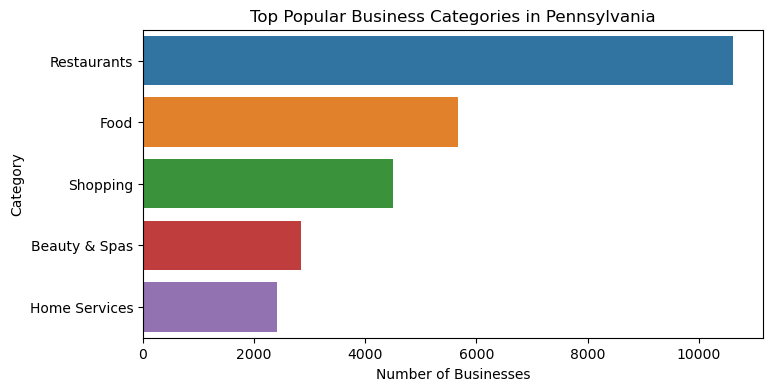

In [ ]:
category_counts_pd = category_counts.toPandas()

plt.figure(figsize=(8, 4))
sns.barplot(data=category_counts_pd.head(10), x="count", y="category")
plt.title("Top Popular Business Categories in Pennsylvania")
plt.xlabel("Number of Businesses")
plt.ylabel("Category")
plt.show()

This graph shows that the "Restaurants" category is the most populous, indicating a robust and potentially competitive dining industry within the state. The "Food" category follows, suggesting a strong interest in specialized food services and providers. "Shopping" ranks third, reflecting a healthy retail sector. "Beauty & Spas" and "Home Services" appear less numerous but still significant, pointing to a demand for personal care and domestic services. These findings suggest that while Pennsylvanians actively engage with a variety of services, their interests and economic activities are particularly concentrated in food-related and retail businesses.

**Q22. What kind of business are popular among elite users in Pennsylvania?**

In [ ]:
df_business = df_business.withColumnRenamed('name', 'business_name')
df_user = df_user.withColumnRenamed('name', 'user_name')

top_categories = ['Restaurants', 'Food', 'Shopping', 'Beauty & Spas', 'Home Services']

pa_business_df = df_business.filter(col('state') == 'PA') \
                            .filter(col('categories').isNotNull()) \
                            .withColumn("category", explode(split(col("categories"), ", "))) \
                            .filter(col('category').isin(top_categories))

business_reviews_df = pa_business_df.join(df_review, "business_id")

combined_df = business_reviews_df.join(df_user, "user_id") \
                                 .select(business_reviews_df["business_id"], "user_id", "business_name", df_user["review_count"], "yelping_since", "elite", "average_stars", "category")

combined_df = combined_df.withColumn('was_elite', when(col('elite') != '', True).otherwise(False))

category_preferences_by_elite = combined_df.groupBy("category", "was_elite").count()

category_preferences_by_elite.show()

+-------------+---------+------+
|     category|was_elite| count|
+-------------+---------+------+
|  Restaurants|     true|274669|
|     Shopping|     true| 25632|
|Home Services|     true|  3475|
|Home Services|    false| 43474|
|Beauty & Spas|    false| 74958|
|         Food|    false|280731|
|Beauty & Spas|     true| 10164|
|         Food|     true|115599|
|     Shopping|    false| 86095|
|  Restaurants|    false|775487|
+-------------+---------+------+



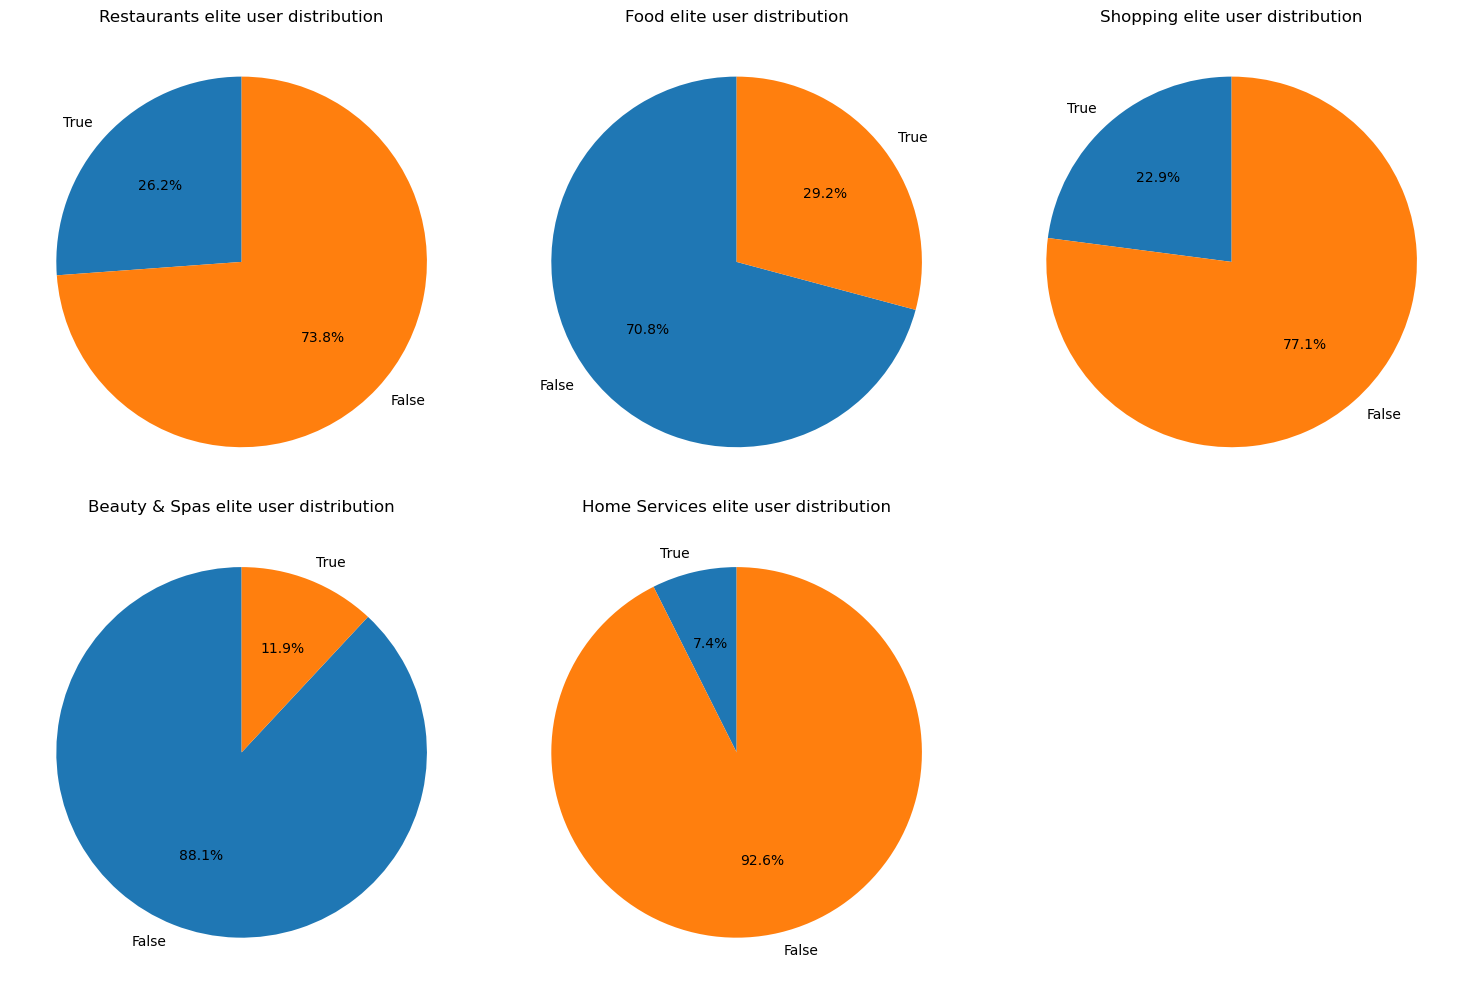

In [ ]:
category_preferences_pd = category_preferences_by_elite.toPandas()
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

restaurant_data = category_preferences_pd[category_preferences_pd['category'] == 'Restaurants']
axs[0, 0].pie(restaurant_data['count'], labels=restaurant_data['was_elite'], autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Restaurants elite user distribution')

food_data = category_preferences_pd[category_preferences_pd['category'] == 'Food']
axs[0, 1].pie(food_data['count'], labels=food_data['was_elite'], autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Food elite user distribution')

shopping_data = category_preferences_pd[category_preferences_pd['category'] == 'Shopping']
axs[0, 2].pie(shopping_data['count'], labels=shopping_data['was_elite'], autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Shopping elite user distribution')

beauty_data = category_preferences_pd[category_preferences_pd['category'] == 'Beauty & Spas']
axs[1, 0].pie(beauty_data['count'], labels=beauty_data['was_elite'], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Beauty & Spas elite user distribution')

home_services_data = category_preferences_pd[category_preferences_pd['category'] == 'Home Services']
axs[1, 1].pie(home_services_data['count'], labels=home_services_data['was_elite'], autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Home Services elite user distribution')

axs[1, 2].axis('off')
plt.tight_layout()
plt.show()

Based on the pie charts, elite Yelp users in Pennsylvania exhibit a stronger preference for the Food category than other categories, which has the highest proportion of elite reviews at 29.2%. This suggests a robust interest in a broad range of food-related experiences beyond restaurants. The Restaurant category is also popular among elite Yelp users, and has a slightly lower proportion at 26.1%, indicating that elite users are active participants in reviewing dining establishments as well.

**Q23. What is the yearly trend of these 5 categories in Pennsylvania?**

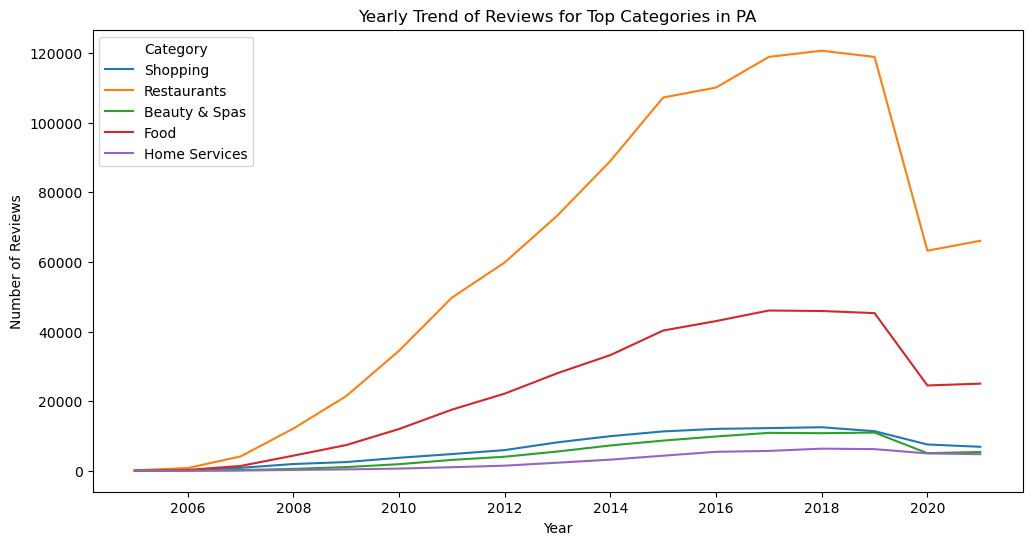

In [ ]:
df_review = df_review.withColumn("date", to_date("date", "yyyy-MM-dd"))

df_review = df_review.withColumn("year", year("date"))

# Filter reviews up to 2021
df_review = df_review.filter(df_review['year'] <= 2021)

business_reviews_df = pa_business_df.join(df_review, "business_id")

reviews_time_category = business_reviews_df.groupBy("category", "year").count()

category_trends_pd = reviews_time_category.toPandas()

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends_pd, x="year", y="count", hue="category")
plt.title('Yearly Trend of Reviews for Top Categories in PA')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Category')
plt.show()

The year-over-year review trend for Pennsylvania’s top business categories reveals that "Restaurants" consistently dominate, suggesting a vibrant dining culture. "Food" also maintains a strong showing, indicating a broad interest in culinary experiences. While "Shopping" reviews indicate a healthy retail sector, "Beauty & Spas" and "Home Services" have fewer reviews, hinting at more specialized markets. A recent decline across all categories suggests a statewide impact from external events, likely the COVID-19 pandemic, affecting consumer engagement.

**Q24. What are the attribution in common among restaurants in Pennsylvania?**

In [ ]:
# Filter for businesses in Pennsylvania that are categorized as restaurants
df_pa_restaurants = df_business.filter(
    (col('state') == 'PA') &
    (col('categories').contains('Restaurants'))
)
df_attributes = df_pa_restaurants.select(
    "business_id",
    "stars",
    *(col("attributes." + attribute).alias(attribute) for attribute in [
        "AcceptsInsurance", "AgesAllowed", "Alcohol", "Ambience", "BYOB",
        "BYOBCorkage", "BestNights", "BikeParking", "BusinessAcceptsBitcoin",
        "BusinessAcceptsCreditCards", "BusinessParking", "ByAppointmentOnly",
        "Caters", "CoatCheck", "Corkage", "DietaryRestrictions", "DogsAllowed",
        "DriveThru", "GoodForDancing", "GoodForKids", "GoodForMeal",
        "HairSpecializesIn", "HappyHour", "HasTV", "Music", "NoiseLevel",
        "Open24Hours", "OutdoorSeating", "RestaurantsAttire", "RestaurantsCounterService",
        "RestaurantsDelivery", "RestaurantsGoodForGroups", "RestaurantsPriceRange2",
        "RestaurantsReservations", "RestaurantsTableService", "RestaurantsTakeOut",
        "Smoking", "WheelchairAccessible", "WiFi"
    ])
)

attribute_analysis = df_attributes.select(
    [count(col(attribute)).alias(attribute) for attribute in df_attributes.columns if attribute != 'business_id' and attribute != 'stars']
)

attribute_analysis_pd = attribute_analysis.toPandas()
attribute_analysis_df = attribute_analysis_pd.transpose()
attribute_analysis_df.reset_index(inplace=True)
attribute_analysis_df.columns = ['Attribute', 'Count']
attribute_analysis_df.sort_values(by='Count', ascending=False, inplace=True)
attribute_analysis_df

,Attribute,Count
35,RestaurantsTakeOut,10209
30,RestaurantsDelivery,10029
9,BusinessAcceptsCreditCards,9863
10,BusinessParking,9598
32,RestaurantsPriceRange2,9114
27,OutdoorSeating,9071
33,RestaurantsReservations,8944
23,HasTV,8805
3,Ambience,8709
2,Alcohol,8483


In [ ]:
df_pa_restaurants.count()

10621

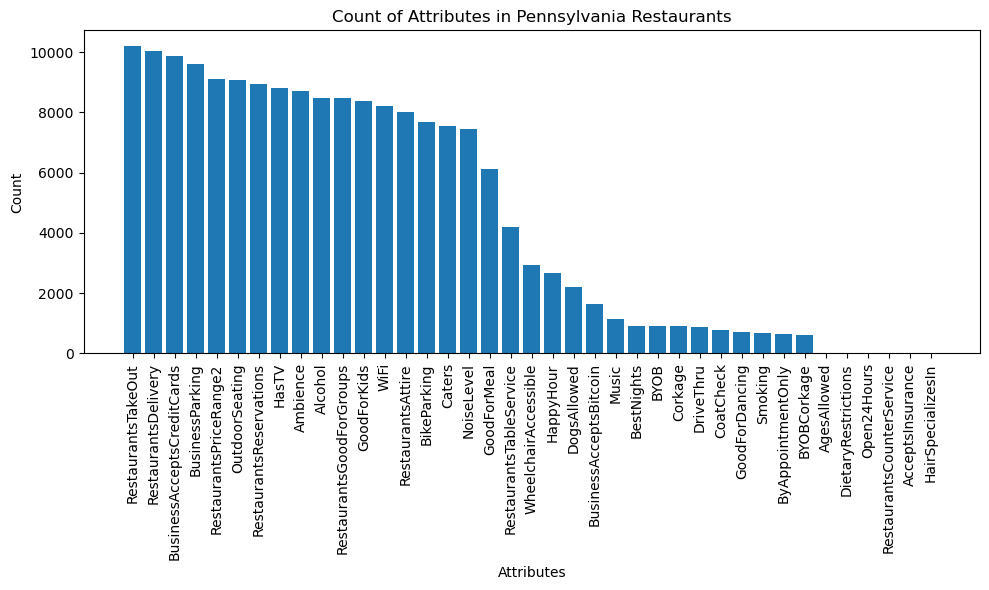

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(attribute_analysis_df['Attribute'], attribute_analysis_df['Count'])

plt.xlabel('Attributes')
plt.ylabel('Count')
plt.title('Count of Attributes in Pennsylvania Restaurants')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The bar chart shows the most to least common attributes in Pennsylvania restaurants. The most common attributions are services such as takeout and delivery, which nearly every restaurant seems to offer, emphasizing the importance of convenience in this market. Credit card acceptance and the ability to make reservations are also widespread, suggesting a strong customer service orientation among these businesses.Outdoor seating and amenities like Wi-Fi indicate that these restaurants value customer experience, providing comfortable and convenient environments for their customers. The rarity of 24-hour service and acceptance of insurance implies these are unique offerings in several Pennsylvania restaurants, which may represent potential opportunities for differentiation in a competitive market.

### 7. Creating Clusters of Embeddings

To work with the reviews, we need to preprocesss the data. This will involve removing stop words, special characters, and tokenizing after that is complete. This will allow us to fit the text to models that can create embeddings

#### 7.1 Building the DF and getting tokens (Preprocessing)

In [ ]:
biz_cluster_data = df_business.select('business_id', 'state', 'categories')
joinExpression = df_review['business_id'] == biz_cluster_data['business_id']
cluster_df = df_review.join(biz_cluster_data, joinExpression, 'left_outer')

cluster_df.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|         business_id|state|          categories|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|XQfwVwDr-v0ZS3_Cb...|   PA|Restaurants, Brea...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|7ATYjTIgM3jUlt4UM...|   PA|Active Life, Cycl...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import lower, trim, regexp_replace


# regex
cluster_df_reviews = cluster_df.withColumn('text', F.lower(F.trim(F.regexp_replace('text', r'/[^a-zA-Z0-9]/g', ''))))
cluster_df_reviews = cluster_df_reviews.withColumn('text', F.lower(F.trim(F.regexp_replace('text', r'[^a-zA-Z\s]', ''))))
cluster_df_reviews = cluster_df_reviews.withColumn('text', F.lower(F.trim(F.regexp_replace('text', r'[^\w\d\s]', ''))))

# tokenize
tkn = Tokenizer().setInputCol('text').setOutputCol('review_tkns')
tokenized = tkn.transform(cluster_df_reviews.select('text'))

tokenized.show(20)

# remove common / stop words
esw = StopWordsRemover.loadDefaultStopWords('english')
sw = StopWordsRemover()\
  .setStopWords(esw)\
  .setInputCol('review_tkns')\

clean_tokenized = sw.transform(tokenized)

+--------------------+--------------------+
|                text|         review_tkns|
+--------------------+--------------------+
|if you decide to ...|[if, you, decide,...|
|ive taken a lot o...|[ive, taken, a, l...|
|family diner had ...|[family, diner, h...|
|wow  yummy differ...|[wow, , yummy, di...|
|cute interior and...|[cute, interior, ...|
|i am a long term ...|[i, am, a, long, ...|
|loved this tour i...|[loved, this, tou...|
|amazingly amazing...|[amazingly, amazi...|
|this easter inste...|[this, easter, in...|
|had a party of  h...|[had, a, party, o...|
|my experience wit...|[my, experience, ...|
|locals recommende...|[locals, recommen...|
|love going here f...|[love, going, her...|
|good foodloved th...|[good, foodloved,...|
|the bun makes the...|[the, bun, makes,...|
|great place for b...|[great, place, fo...|
|tremendous servic...|[tremendous, serv...|
|the hubby and i h...|[the, hubby, and,...|
|i go to blow bar ...|[i, go, to, blow,...|
|my absolute favor...|[my, absol

#### 7.2 Fitting Word2Vec and getting embeddings

By fitting Word2Vec to our clean and tokenized reviews, we can turn the text into embeddings that capture the context of each word in a given review. These embeddings will allow us to perform additional analyses to create a more generalizable dataset for business owners

In [ ]:
from pyspark.ml.feature import Word2Vec

subset = clean_tokenized.sample(fraction=.2, seed=42)
info_sub = cluster_df_reviews.sample(fraction=.2, seed=42)

w2v = Word2Vec(vectorSize=100, minCount=5, inputCol='review_tkns', outputCol='embeddings')

model = w2v.fit(subset.select('review_tkns'))
embeddings = model.transform(subset.select('review_tkns'))

In [ ]:
embeddings = embeddings.withColumn("id", F.monotonically_increasing_id())
info_sub = info_sub.withColumn("id", F.monotonically_increasing_id())

joined_df = info_sub.join(embeddings, "id", "inner").drop("id")
joined_df.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|         business_id|state|          categories|         review_tkns|          embeddings|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|if you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|XQfwVwDr-v0ZS3_Cb...|   PA|Restaurants, Brea...|[if, you, decide,...|[0.02280344190533...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|ive taken a lot o...|     1|OyoGAe7OKpv6

#### 7.3 Reducing dimensionality with PCA for k-means

So the data is interpretable, we need to reduce our dimensions. This will allow better convergence for clustering, as well as the ability to visualize the information. TSNE would be a better option here, but it is not readily available through any packages that scale with spark

In [ ]:
from pyspark.ml.feature import PCA
pca = PCA().setInputCol('embeddings').setOutputCol('features').setK(3)
pcas = pca.fit(embeddings.select('embeddings')).transform(embeddings.select('embeddings'))
pcas.show()

+--------------------+--------------------+
|          embeddings|            features|
+--------------------+--------------------+
|[0.02280344190533...|[-0.1231293621834...|
|[0.00931980702786...|[-0.0147637321714...|
|[-0.0093110880645...|[0.13205779217657...|
|[0.04218908390642...|[-0.0098827701479...|
|[0.00644657599858...|[0.04782480502531...|
|[0.01290873664413...|[-0.0959057434275...|
|[0.01362287934075...|[0.01236635825005...|
|[-0.0173153734541...|[0.08334636483682...|
|[0.00944349035111...|[-0.0283662464275...|
|[0.01550860527280...|[0.05979840566389...|
|[0.02351794658560...|[-0.0362333027250...|
|[0.01023607347987...|[-0.0224949149166...|
|[0.02574365283857...|[-0.0196282902114...|
|[-0.0203111075279...|[0.21590953217611...|
|[0.00779788181751...|[0.01763537448551...|
|[0.00908199694521...|[0.10131840641817...|
|[-8.4246350784919...|[0.06209354811453...|
|[0.02395588677128...|[-0.0485403674128...|
|[0.02547325189553...|[-0.0687945988346...|
|[0.00736854506805...|[0.0675778

#### 7.4 Clustering

Now that we have our embeddings, we need to make use of them. We can cluster the embeddings to see if context across reviews creates any separation, and more generalizability, to help further inform decision making for business owners. We'll create optimal cluster Ks using the elbow method, and then group by our predictions to compare trends across clusters.

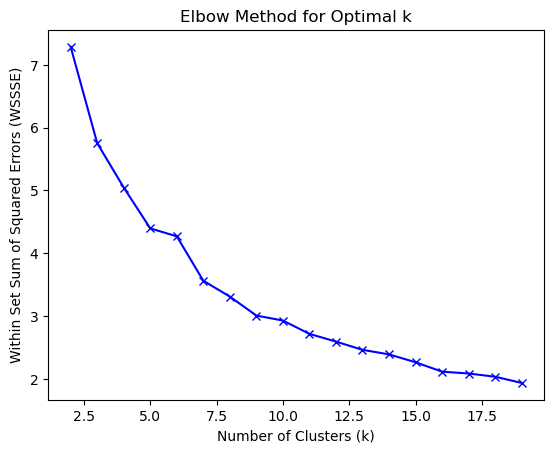

In [ ]:
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store WSSSE for different values of k
wssse = []

# Set the range of k values you want to try
k_values = range(2, 20)

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans with the current value of k
    km = KMeans().setK(k)

    # Fit the KMeans model
    kmModel = km.fit(pcas.select('features'))

    # Calculate the Within Set Sum of Squared Errors (WSSSE)
    wssse.append(kmModel.summary.trainingCost)

# Plot the elbow curve
plt.plot(k_values, wssse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
km = KMeans().setK(8)
print(km.explainParams())
kmModel = km.fit(pcas.select('features'))

predictions = kmModel.transform(pcas)

df_with_id = info_sub.withColumn("id", F.monotonically_increasing_id())
predictions_with_id = predictions.withColumn("id", F.monotonically_increasing_id())

cluster_analysis = df_with_id.join(predictions_with_id.select('id', 'prediction', 'features'), on='id', how='inner')
cluster_analysis.show(20)

distanceMeasure: the distance measure. Supported options: 'euclidean' and 'cosine'. (default: euclidean)
featuresCol: features column name. (default: features)
initMode: The initialization algorithm. This can be either "random" to choose random points as initial cluster centers, or "k-means||" to use a parallel variant of k-means++ (default: k-means||)
initSteps: The number of steps for k-means|| initialization mode. Must be > 0. (default: 2)
k: The number of clusters to create. Must be > 1. (default: 2, current: 8)
maxIter: max number of iterations (>= 0). (default: 20)
predictionCol: prediction column name. (default: prediction)
seed: random seed. (default: 7969353092125344463)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 0.0001)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)


+---+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+----------+--------------------+
| id|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|         business_id|state|          categories|prediction|            features|
+---+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+-----+--------------------+----------+--------------------+
|  0|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|if you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|XQfwVwDr-v0ZS3_Cb...|   PA|Restaurants, Brea...|         4|[-0.1231293621834...|
|  1|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|ive taken a lot o...|     1|OyoGAe7OKpv6SyGZT...|7ATYjTIgM3j

used ChatGPT to help me parse the vector dtype and build a chart that would scale well with spark

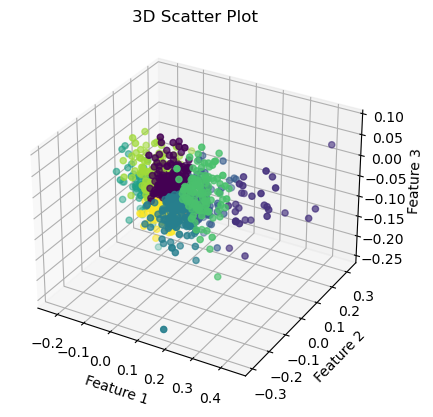

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z components of the feature vectors
x_values = cluster_analysis.select("features").rdd.map(lambda x: x[0][0]).collect()
y_values = cluster_analysis.select("features").rdd.map(lambda x: x[0][1]).collect()
z_values = cluster_analysis.select("features").rdd.map(lambda x: x[0][2]).collect()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c=cluster_analysis.select("prediction").collect(), cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot')
plt.show()

We can see that the clusters don't separate super well, which leaves little room for interpretability. This is likely due to the tools we used (Word2Vec & PCA), as we aren't capturing between token similarity and we're having large information loss from PCA. However, we can still look at the summary of the clusters to pull out some differences.

In [ ]:
from pyspark.sql.functions import avg, first, collect_list

cluster_summary = cluster_analysis.groupby("prediction").agg(
    avg("stars").alias("avg_stars"),
    first("categories").alias("mode_categories"),
    first("state").alias("mode_state")
)

cluster_summary.show()

+----------+------------------+--------------------+----------+
|prediction|         avg_stars|     mode_categories|mode_state|
+----------+------------------+--------------------+----------+
|         0| 4.167539267015707|Active Life, Cycl...|        PA|
|         1| 4.633333333333334|Pizza, Restaurant...|        PA|
|         2| 4.031914893617022|Sandwiches, Beer,...|        LA|
|         3| 3.785276073619632|Halal, Pakistani,...|        PA|
|         4| 3.066666666666667|Restaurants, Brea...|        PA|
|         5|             4.376|Restaurants, Brea...|        AZ|
|         6| 3.728476821192053|Mediterranean, Re...|        PA|
|         7|3.3859649122807016|   Shopping, Jewelry|        FL|
+----------+------------------+--------------------+----------+



In [ ]:
summary = cluster_summary.toPandas()
summary

,prediction,avg_stars,mode_categories,mode_state
0,0,4.167539,"Active Life, Cycling Classes, Trainers, Gyms, ...",PA
1,1,4.633333,"Pizza, Restaurants, Italian, Salad",PA
2,2,4.031915,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",LA
3,3,3.785276,"Halal, Pakistani, Restaurants, Indian",PA
4,4,3.066667,"Restaurants, Breakfast & Brunch, Food, Juice B...",PA
5,5,4.376000,"Restaurants, Breakfast & Brunch",AZ
6,6,3.728477,"Mediterranean, Restaurants, Seafood, Greek",PA
7,7,3.385965,"Shopping, Jewelry",FL


From the table we can draw some differences from the clusters. Based on the context of each yelp review, we define 8 broader categories. Business owners can utilze this information to categorize their own business, or identify over saturated categories in specific states, as well as the general rating of businesses. They can use this information to decide whether or not entry into certain markets will be more or less difficult depending on their positioning


### 8. Key Observations and Summary

#### 8.1 Key Observations



1. Examination of review volumes across states such as Pennsylvania (PA) and Florida (FL) shows a robust engagement with Yelp's restaurant review system. The count of over one million reviews in each of these states shows us that a considerable willingness among customers to contribute feedback and sharing their experiences.

2. Insights learned from compliment counts shed light on the quality of dining experiences across various cities. Notably, both Philadelphia and New Orleans emerge as leading cities. This  suggests these two cities are capable of providing exceptional dining encounters, as evidenced by the positive feedback garnered.

3. Insights from the most and least popular businesses aids both entrepreneurs and Yelp in enhancing service offerings and grasping their market forte. For instance, in Florida, there is room for growth and improvement in Mobile Home Dealers and Home Developer sectors, indicating these markets have potential yet to be fully tapped.

4. Broadly speaking, the restaurant sector garners the highest volume of reviews, reflecting its significant engagement with consumers.

5. Overall, categories such as Mohels and Patent Law have achieved the highest ratings, while Electricity Supply and Foot Care represent areas with lower ratings, indicating differing levels of customer satisfaction and engagement across these business categories.

6. The uniformity observed across various state distributions presents a challenge in conclusively determining the comparative feasibility of business ventures in one state over another. This consistency in trend implies the necessity to delve deeper, focusing on specific categories or city-level data within states, to extract more nuanced insights and facilitate more informed business decisions.

7. It was observed that 5-star ratings are the most common. This suggests a generally positive sentiment from users or users are more likely to leave a review when they have an exceptional experience.

8. A trend of increasing yearly review counts was observed, peaking around 2019 before a dramatic drop occurred in 2020 and 2021. This shows that Yelp has gained great success in their business since they founded and COVID-19 may be the main cause of the review amount decrease in 2020 and 2021. Yelp should maintain its main business strategy and try some new methods to recover its business from the COVID-19.

9. States ranks on review score and num of businesses show a positive correlation, more businesses also mean a more overall satisfied customer. This relationships could signify that the more competitive a market is, the more satisfied a customer is overall.

10. Pennsylvania and Florida were the top two states with a considerable number of businesses in our dataset. States could try to follow Penn and Florida’s business practices to add more businesses. Yelp could use better strategies to expand in other states.

11. The most popular business, Acme Oyster House, based on the number of reviews recorded over 7,000 reviews.

12. Some states show consistency and others exhibit broader diversity, while sparse data in certain regions suggests limited representation or fewer reviews.

13. As expected, CVS Pharmacy and Walgreens, two major chains, surfaced as the leaders in coverage within this dataset.

14. Positive correlations between star ratings and the number of reviews suggest customer satisfaction drives success, whereas negative correlations with longitude hint at geographical influences on business performance.

15. Elite Yelp users in Pennsylvania prefer the Food category most, with nearly a third of their reviews, and also frequently review restaurants, underscoring their active engagement with the cuisine related categories.

16. In Pennsylvania, "Restaurants" and "Food" are the top categories for Yelp reviews each year, showing a strong interest in eating out and food-related experiences. However, a decrease in reviews for all types of businesses suggests that events like the COVID-19 pandemic have greatly affected how often people engage with these services.

17. In Pennsylvania's competitive dining landscape, restaurants focus on convenience and customer experience, with room for differentiation in offering services like 24-hour operations and insurance acceptance.

18. Food is the most frequent sub-category in our dataset. Utilizing this information we see a negative trend in fast food chains. This shows consumer sentiment at least through scores/ratings has been falling for fast-food restaurants. These chains might see a decline in popularity if the trend follows, highlighting a consumer shift in demand towards more healthier alternatives.

19. The context of a review (and potentially the sentiment) can reveal differences in rating, category frequency, and state frequency. Using these clusters, business owners could better generalize the very specific category column and find themselves in a broader group, or use these cluster groups for more informed decision making.

#### 8.2 Summary



The review volumes in states like Pennsylvania and Florida highlight significant engagement with Yelp's restaurant review system, as evidenced by over a million reviews in each state, indicating a strong willingness among customers to share feedback. Detailed insights from compliment counts reveal that cities like Philadelphia and New Orleans offer exceptional dining experiences, supported by positive user feedback. Analysis of the most and least popular businesses provides valuable information for entrepreneurs and Yelp to refine their services, especially in under-tapped sectors like Mobile Home Dealers and Home Developers in Florida. Overall, the restaurant sector dominates review volumes, indicating high consumer interaction. Moreover, categories like Mohels and Patent Law achieve the highest ratings, whereas sectors like Electricity Supply and Foot Care lag behind, reflecting varied customer satisfaction levels. Trends over the years show a peak in reviews in 2019, followed by a drop during the pandemic years 2020 and 2021, suggesting the impact of COVID-19 on review activity. The data also reveals that states with more businesses tend to have higher customer satisfaction, indicating that competitive markets enhance customer experiences. Additionally, CVS Pharmacy and Walgreens lead in coverage, illustrating their significant market presence. The consistent positive correlation between high ratings and review counts across various states suggests that customer satisfaction is a crucial driver of business success. Review context and sentiment can expose variations in ratings, category, and regional frequencies. Business owners can use this data to categorize their services more broadly or enhance decision-making through these clusters.

### 9. Limitations



1. The dataset by yelp is anonymized and subsetted in order to keep individual user information private. This subset is not a good distribution of the companies and businesses in a given area. This leads to Famous places like Mcdonald's to end up with less than 100 stores in our dataset. This is more evident in this case as number of Burger King stores were way greater than Mcdonald's.

2. While working to find patterns within the food category, the cuisine types were labeled randomly, making it hard to categorize restaurants into the respective cuisine types.

3. A serious limitation of our analysis is that for our cluster analysis we had to sample the data we had when fitting the Word2Vec model. The process is too memory intensive that even after trying multiple variations of computing clusters (increasing workers, increasing the memory of the workers, etc), we still ran into computational difficulties. The subset limits the efficacy of the cluster analysis, but the methodology is still sound

4. To speak further on the cluster analysis, Word2Vec also limits the useability of the clusters, as we are only providing context for each individual word in a sentence, not including their relationship among each other. For this reason, we wanted to use transformer embeddings from pretrained general purpose hugging face transformers (such as ALBERT), but dataproc has trouble when it comes to reading in JavaObject variables from 3rd party librarys (ie transformers, ie sparknlp).

5. Lastly, the use of PCA is a little short sighted especially when reducing embeddings vector dimensionality. shrinking from 100 to 3 is likely resulting in a large information loss, and it would be better to use TSNE, but this dimensionality reduction technique is not readily available in pyspark (nor has anyone released an open source work around as of yet)

### 10. Conclusion



Review volumes in Pennsylvania and Florida demonstrate robust engagement with Yelp's system, with over a million reviews highlighting a strong customer willingness to share experiences. Cities like Philadelphia and New Orleans are recognized for exceptional dining experiences. The data suggests high interaction in the restaurant sector and varying customer satisfaction across different categories, with Mohels and Patent Law receiving high ratings, while sectors like Electricity Supply and Foot Care have lower ratings. A significant trend noted was the peak in review activity in 2019, followed by a decline during 2020 and 2021 due to the pandemic. Additionally, CVS Pharmacy and Walgreens are prominent in market coverage. Overall, the data reveals that competitive markets tend to have higher customer satisfaction, underscoring that customer satisfaction is key to business success. Review context and sentiment can expose variations in ratings, category, and regional frequencies. Business owners can use this data to categorize their services more broadly or enhance decision-making through these clusters.

### 11. References

Throughout the duration of this project, ChatGPT has been utilized for the following purposes:
1. To refine and articulate sentences in a professional and formal manner, ensuring clarity and precision in communication.

We made use of ChatGPT in this paragraph, in order to refine the language. <br>

Summary

The review volumes in states like Pennsylvania and Florida highlight significant engagement with Yelp's restaurant review system, as evidenced by over a million reviews in each state, indicating a strong willingness among customers to share feedback. Detailed insights from compliment counts reveal that cities like Philadelphia and New Orleans offer exceptional dining experiences, supported by positive user feedback. Analysis of the most and least popular businesses provides valuable information for entrepreneurs and Yelp to refine their services, especially in under-tapped sectors like Mobile Home Dealers and Home Developers in Florida. Overall, the restaurant sector dominates review volumes, indicating high consumer interaction. Moreover, categories like Mohels and Patent Law achieve the highest ratings, whereas sectors like Electricity Supply and Foot Care lag behind, reflecting varied customer satisfaction levels. Trends over the years show a peak in reviews in 2019, followed by a drop during the pandemic years 2020 and 2021, suggesting the impact of COVID-19 on review activity. The data also reveals that states with more businesses tend to have higher customer satisfaction, indicating that competitive markets enhance customer experiences. Additionally, CVS Pharmacy and Walgreens lead in coverage, illustrating their significant market presence. The consistent positive correlation between high ratings and review counts across various states suggests that customer satisfaction is a crucial driver of business success.

2. In Question 17 of part 5.3, Chatgpt was used to rectify a code where restaurants with an apostrophe were causing a problem to reach the desired solution.

fast_food = spark.sql('''
    SELECT
        name AS Restaurant,
        AVG(stars) AS Avg_Review,
        SUM(review_count) AS Review_Count,
        COUNT(*) AS Total_Businesses
    FROM business
    WHERE
        name IN ('Burger King', 'Subway', 'Popeyes', 'McDonald''s', 'Starbucks', 'KFC', 'Chick-Fil-A', 'Domino''s', 'Wendy''s', 'Arby''s')
    GROUP BY name
    HAVING Total_Businesses >100
    ORDER BY Avg_Review DESC
''')
fast_food_df = fast_food.toPandas()
fast_food_df.head(10)

Chatgpt was used to fix a code where Restaurants with an apostrophe were breaking the code even with a \.